## Aggregate data and generate dataframe needed

In [1]:
import seaborn
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/yechankim/Desktop/RC Analysis/Overall (Slide 3,14,15,16,17,18,27)/merge_data_2.csv")
location_data = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/Overall (Slide 3,14,15,16,17,18,27)/July4th_Location.xlsx")
data.head()

,id,Zip Code First Half,Zip Code Late,Gender,Date of Birth,First Purchase,Last Purchase,Number of Purchase,Purchase Amount,Member Registration Date,...,Dog or Cat,Petbleed,Petsex,Pet BirthDate,Pets Contraception Castration,Pets lifestyle,Useof RC products,Allow mail Reception,Pet Registration Date,Pet Information Update Date
0,43271,999.0,9992.0,2,NaN,NaN,NaN,0,0,9/30/17 13:10,...,2,59900000001,2,7/1/13,1,1,2,1,9/30/17 13:10,9/30/17 13:10
1,42088,994.0,9940.0,2,NaN,NaN,NaN,0,0,9/28/17 19:40,...,2,50000999999,2,4/2/00,1,1,4,1,9/28/17 19:40,9/28/17 19:40
2,22240,989.0,9892.0,2,1/22/77,NaN,NaN,0,0,3/11/17 7:16,...,2,59900000001,2,11/21/15,2,3,4,1,3/11/17 7:16,3/11/17 7:16
3,22240,989.0,9892.0,2,1/22/77,NaN,NaN,0,0,3/11/17 7:16,...,2,59900000001,1,4/7/16,1,3,4,1,3/11/17 7:16,3/11/17 7:16
4,22240,989.0,9892.0,2,1/22/77,NaN,NaN,0,0,3/11/17 7:16,...,2,59900000001,2,1/5/17,2,1,4,1,3/11/17 7:16,3/11/17 7:16


In [2]:
data["Zip Code First Half"] = data["Zip Code First Half"].astype(int);
data["Zip Code First Half"] = data["Zip Code First Half"].astype(str);
data["Zip Code Late"] = data["Zip Code Late"].astype(int);
data["Zip Code Late"] = data["Zip Code Late"].astype(str);
data["Zip Code First Half"] = data["Zip Code First Half"].str.zfill(3);
data["Zip Code Late"] = data["Zip Code Late"].str.zfill(4);

In [3]:
full_zip_list = list()
for index, row in data.iterrows():
    full_zip = row["Zip Code First Half"]+"-"+ row["Zip Code Late"] 
    full_zip_list.append(full_zip)
full_zip_list[:5]

['999-9992', '994-9940', '989-9892', '989-9892', '989-9892']

In [4]:
data["Postal Code"] = full_zip_list

In [5]:
data_negative = data

In [6]:
data = data[['id','Postal Code','Gender','Date of Birth',
                    'Number of \nPurchase','Purchase \nAmount','Dog or Cat',
                    'Petbleed','Petsex','Email Reception\nPermission']]
data = data.sort_values(by = "Number of \nPurchase",ascending = False)
data.head()

,id,Postal Code,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission
50923,241,225-0023,1,NaN,204,519055,1,60000000144,2,3
50924,241,225-0023,1,NaN,204,519055,2,59900000001,1,3
50932,241,225-0023,1,NaN,204,519055,2,50000000001,2,3
50933,241,225-0023,1,NaN,204,519055,2,50000000055,2,3
61202,3159,513-0004,1,NaN,56,304721,1,60000000133,1,3


In [7]:
len(data)

65496

Eliminating data with the number of purchase = 0

In [8]:
data_subset = data[data["Number of \nPurchase"] != 0 ]
len(data_subset)

11823

In [9]:
data_subset.head()

,id,Postal Code,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission
50923,241,225-0023,1,NaN,204,519055,1,60000000144,2,3
50924,241,225-0023,1,NaN,204,519055,2,59900000001,1,3
50932,241,225-0023,1,NaN,204,519055,2,50000000001,2,3
50933,241,225-0023,1,NaN,204,519055,2,50000000055,2,3
61202,3159,513-0004,1,NaN,56,304721,1,60000000133,1,3


In [10]:
first_two_digit_list = list()
for item in data_subset["Postal Code"]:
    first_two_digit = item[:2]
    first_two_digit = int(first_two_digit)
    first_two_digit_list.append(first_two_digit)
len(first_two_digit_list)

11823

In [11]:
data_subset["First_Two"] = first_two_digit_list
data_subset = data_subset.sort_values(by = "First_Two",
                                      ascending = True)
data_subset = data_subset[['id','Postal Code','First_Two','Gender','Date of Birth','Number of \nPurchase',
                           'Purchase \nAmount','Dog or Cat','Petbleed','Petsex','Email Reception\nPermission']]
data_subset.head()

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission
49724,9377,001-0025,0,2,NaN,11,96738,2,50000000041,2,3
17698,13624,007-0838,0,2,12/9/72,1,1248,2,59900000001,2,1
17697,13624,007-0838,0,2,12/9/72,1,1248,2,50000000029,2,1
49176,15129,001-0026,0,2,9/30/75,4,27530,1,60000000506,1,1
38847,13880,004-0053,0,1,1/6/72,1,1404,2,50000000032,2,1


In [12]:
merged_total_data = pd.merge(data_subset,location_data, on ="Postal Code", how = "inner")
merged_total_data

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude
0,9377,001-0025,0,2,NaN,11,96738,2,50000000041,2,3,Kita25-Jonishi,Hokkaido,Sapporo Shi,43.0918,141.3408
1,4571,001-0025,0,2,11/18/71,1,4572,2,50000000004,1,3,Kita25-Jonishi,Hokkaido,Sapporo Shi,43.0918,141.3408
2,4571,001-0025,0,2,11/18/71,1,4572,2,50000000039,1,3,Kita25-Jonishi,Hokkaido,Sapporo Shi,43.0918,141.3408
3,4571,001-0025,0,2,11/18/71,1,4572,2,50000000043,1,3,Kita25-Jonishi,Hokkaido,Sapporo Shi,43.0918,141.3408
4,13624,007-0838,0,2,12/9/72,1,1248,2,59900000001,2,1,Kita38-Johigashi,Hokkaido,Sapporo Shi,43.1070,141.3538
5,13624,007-0838,0,2,12/9/72,1,1248,2,50000000029,2,1,Kita38-Johigashi,Hokkaido,Sapporo Shi,43.1070,141.3538
6,13624,007-0838,0,2,12/9/72,1,1248,2,50000000029,2,1,Kita38-Johigashi,Hokkaido,Sapporo Shi,43.1070,141.3538
7,15129,001-0026,0,2,9/30/75,4,27530,1,60000000506,1,1,Kita26-Jonishi,Hokkaido,Sapporo Shi,43.0928,141.3409
8,13880,004-0053,0,1,1/6/72,1,1404,2,50000000032,2,1,Atsubetsuchuo 3-Jo,Hokkaido,Sapporo Shi,43.0259,144.8505
9,4842,005-0003,0,2,NaN,1,500,2,50000000041,1,1,Sumikawa 3-Jo,Hokkaido,Sapporo Shi,41.5500,140.2500


## Gender Analysis, Slide 14 (1 = Male, 2 = Female)

In [13]:
gender = merged_total_data.drop_duplicates(subset = "id", keep = "first")
len(gender)

9167

In [14]:
male_percent = (((gender["Gender"]==1).sum())/len(gender)*100).round(2)
female_percent = (((gender["Gender"]==2).sum())/len(gender)*100).round(2)

print("Male: ", male_percent,"%")
print("Female: ", female_percent,"%")
print("Total: ", male_percent+female_percent,"%")

Male:  28.45 %
Female:  71.55 %
Total:  100.0 %


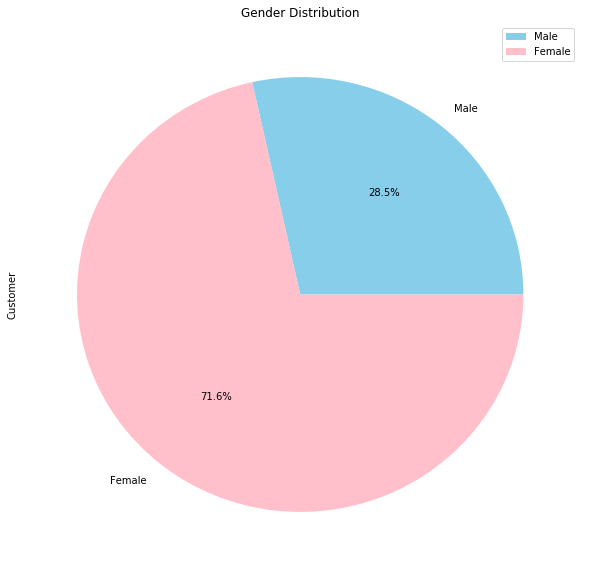

In [15]:
d = {"Customer":[male_percent,female_percent]}
percent_dataframe = DataFrame(d,columns =["Customer"],
                             index = ["Male","Female"])
plot = percent_dataframe.plot.pie(y='Customer', figsize=(10,10),colors = ["skyblue","pink"],
                                 title = "Gender Distribution",autopct='%1.1f%%')

In [16]:
print("Total Purchase Amount: ")
print("Male: ",(gender.groupby("Gender")["Purchase \nAmount"].sum())[1], "Yen")
print("Female: ",(gender.groupby("Gender")["Purchase \nAmount"].sum())[2], "Yen")
print("------------------------------------------------------")
print("Average Purchase Amount: ")
print("Male: ",((gender.groupby("Gender")["Purchase \nAmount"].mean())[1]).round(3), "Yen")
print("Female: ",((gender.groupby("Gender")["Purchase \nAmount"].mean())[2]).round(3), "Yen")
print("------------------------------------------------------")

Total Purchase Amount: 
Male:  72297054 Yen
Female:  140226168 Yen
------------------------------------------------------
Average Purchase Amount: 
Male:  27721.263 Yen
Female:  21379.199 Yen
------------------------------------------------------


Text(0,0.5,'Yen')

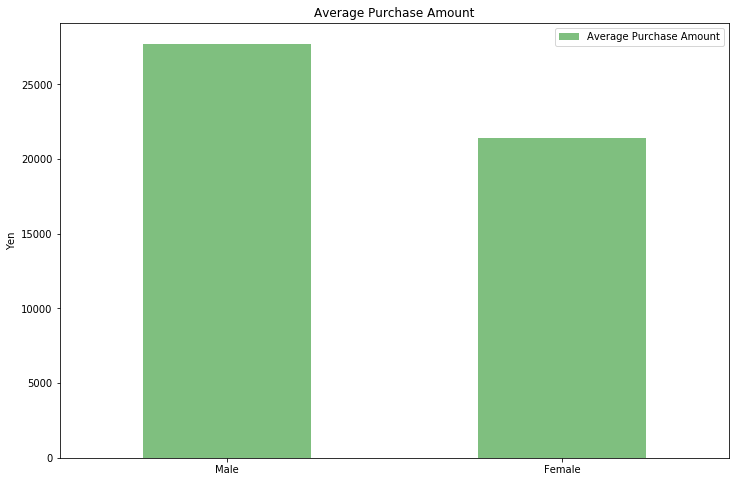

In [17]:
d = {"Average Purchase Amount":[27721.263,21379.199]}
Avg_amt_df = DataFrame(d,columns =["Average Purchase Amount"],
                             index = ["Male","Female"])
Avg_amt_df = Avg_amt_df.round(2)
Avg_amt_plt = Avg_amt_df.plot(kind = "bar", color = ["green"], 
                              alpha = 0.5, figsize=(12,8), rot = 0,
                              title = "Average Purchase Amount")

Avg_amt_plt.set_ylabel("Yen")


## Pet Breed Analysis (1 = Dog, 2 = Cat)

In [18]:
top20breed = ((merged_total_data["Petbleed"]).value_counts()[:20]).to_frame()
top20breed = top20breed.rename({"Petbleed" : "Count"}, axis= "columns")
top20breed.index.name = 'Petbleed'
top20breed = top20breed.reset_index()
top20breed

,Petbleed,Count
0,59900000001,2403
1,60000000506,841
2,60000000320,567
3,50000000041,483
4,50000000004,480
5,60000000130,428
6,50000999999,426
7,60000000133,389
8,50000000032,357
9,50000000031,268


In [19]:
merged_total_data_pet = merged_total_data.groupby(by = "Petbleed").mean()
top20breed_data_mean = pd.merge(merged_total_data_pet,top20breed,on = "Petbleed", how = "inner")
top20breed_data_mean = top20breed_data_mean.drop(["id","First_Two","Gender","Petsex","Email Reception\nPermission",
                                                  "Latitude","Longitude"],axis =1)
top20breed_data_mean.set_index('Petbleed',drop=True,inplace=True)
top20breed_data_mean

,Number of Purchase,Purchase Amount,Dog or Cat,Count
Petbleed,,,,
50000000004,3.333333,19366.125000,2.0,480
50000000010,3.062857,15902.531429,2.0,175
50000000029,4.401575,33383.988189,2.0,254
50000000031,2.675373,20102.167910,2.0,268
50000000032,3.638655,22256.512605,2.0,357
50000000038,3.762646,24688.151751,2.0,257
50000000039,4.048913,27310.978261,2.0,184
50000000041,3.080745,19290.039337,2.0,483
50000999999,2.483568,17350.345070,2.0,426


In [20]:
top20breed_data_mean.sort_values(by="Count", ascending = False)
top20breed_data_mean = top20breed_data_mean.rename({
50000000004:"American Shorthair",
50000000010:"British", 
50000000029:"Maine", 
50000000031:"Munchkin", 
50000000032:"Norway Jean Forrest Cat",
50000000038:"Ragdoll", 
50000000039:"Russian Blue", 
50000000041:"Scottish fold", 
50000999999:"Other cat species", 
59900000001:"Mix",
60000000115:"Yorkshire Terrier",
60000000130:"Dachshund (Miniature)",
60000000133:"Shiba", 
60000000288:"Labrador retriever", 
60000000299:"Golden retriever",
60000000310:"French Bulldog", 
60000000320:"Chihuahua", 
60000000324:"Shih tzu", 
60000000506:"Poodle (Toy)", 
60000000525:"Miniature Schnauzers"}, axis = "index")
top20breed_data_mean["Count"] = ((top20breed_data_mean["Count"]/11823)*100).round(2)
top20breed_data_mean['Purchase \nAmount'] = ((top20breed_data_mean['Purchase \nAmount']/100)).round(2)
top20breed_data_mean['Number of \nPurchase'] = (top20breed_data_mean['Number of \nPurchase']).round(2)
top20breed_data_mean

,Number of Purchase,Purchase Amount,Dog or Cat,Count
Petbleed,,,,
American Shorthair,3.33,193.66,2.0,4.06
British,3.06,159.03,2.0,1.48
Maine,4.40,333.84,2.0,2.15
Munchkin,2.68,201.02,2.0,2.27
Norway Jean Forrest Cat,3.64,222.57,2.0,3.02
Ragdoll,3.76,246.88,2.0,2.17
Russian Blue,4.05,273.11,2.0,1.56
Scottish fold,3.08,192.90,2.0,4.09
Other cat species,2.48,173.50,2.0,3.60


In [21]:
top20breed_data_mean.sort_values(by = "Count",ascending = False)[:20]

,Number of Purchase,Purchase Amount,Dog or Cat,Count
Petbleed,,,,
Mix,3.41,227.25,2.0,20.32
Poodle (Toy),2.84,176.24,1.0,7.11
Chihuahua,2.60,177.23,1.0,4.80
Scottish fold,3.08,192.90,2.0,4.09
American Shorthair,3.33,193.66,2.0,4.06
Dachshund (Miniature),3.38,234.86,1.0,3.62
Other cat species,2.48,173.50,2.0,3.60
Shiba,3.12,245.78,1.0,3.29
Norway Jean Forrest Cat,3.64,222.57,2.0,3.02


In [22]:
top20breed_data_mean.sort_values(by = "Count", ascending = False)
print(top20breed_data_mean["Count"].sum())

73.82


Pet or Dog Distribution in top20 petbreed (approx 74% of all data)

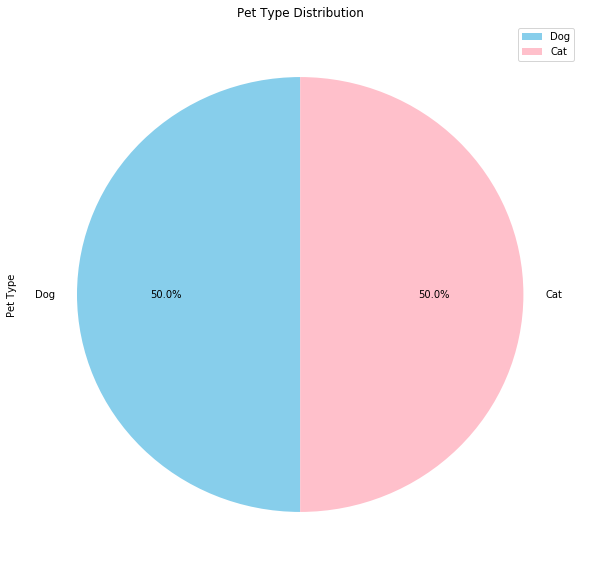

In [23]:
percent_dog = ((top20breed_data_mean["Dog or Cat"] == 1).sum())/(len(top20breed_data_mean))
percent_cat = ((top20breed_data_mean["Dog or Cat"] == 2).sum())/(len(top20breed_data_mean))

d = {"Pet Type":[percent_dog,percent_cat]}
percent_dataframe = DataFrame(d,columns =["Pet Type"],
                             index = ["Dog","Cat"])
plot = percent_dataframe.plot.pie(y='Pet Type', figsize=(10,10),colors = ["skyblue","pink"],
                                  startangle=90,autopct='%1.1f%%',
                                 title = "Pet Type Distribution")

In [24]:
print("Pet or Dog Distribution in top 20 petbreed (74% of all data)")
print("Percent of Dog: ",percent_dog*100)
print("Percent of Cat: ",percent_cat*100)

Pet or Dog Distribution in top 20 petbreed (74% of all data)
Percent of Dog:  50.0
Percent of Cat:  50.0


Dog owner spend more than Cat owners

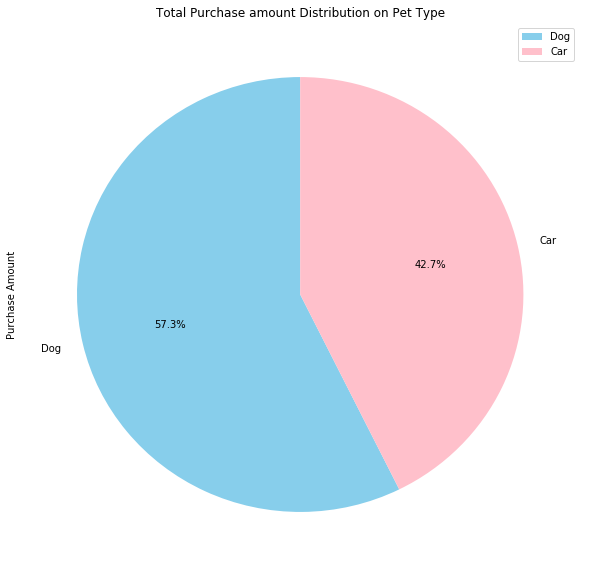

In [25]:
dogandpet_mean = top20breed_data_mean.groupby(by = "Dog or Cat").mean()
purchase_dog = (dogandpet_mean.loc[1]["Purchase \nAmount"])/(dogandpet_mean["Purchase \nAmount"].sum())
purchase_cat = (dogandpet_mean.loc[2]["Purchase \nAmount"])/(dogandpet_mean["Purchase \nAmount"].sum())
d = {"Purchase Amount":[purchase_dog,purchase_cat]}
percent_dataframe = DataFrame(d,columns =["Purchase Amount"],
                             index = ["Dog","Car"])
plot = percent_dataframe.plot.pie(y='Purchase Amount', figsize=(10,10),colors = ["skyblue","pink"],
                                  startangle=90,autopct='%1.1f%%',
                                 title = "Total Purchase amount Distribution on Pet Type")

In [26]:
top_breed_dog = top20breed_data_mean[top20breed_data_mean["Dog or Cat"] == 1]
top_breed_cat = top20breed_data_mean[top20breed_data_mean["Dog or Cat"] == 2]

dog_purchase_num_mean = (top_breed_dog["Number of \nPurchase"].mean())
car_purchase_num_mean = (top_breed_cat["Number of \nPurchase"].mean())

dog_purchase_amt_mean = (top_breed_dog["Purchase \nAmount"].mean())
car_purchase_amt_mean = (top_breed_cat["Purchase \nAmount"].mean())

print(dog_purchase_num_mean,car_purchase_num_mean,dog_purchase_amt_mean,car_purchase_amt_mean)

3.435 3.3890000000000002 298.62 222.37600000000003


In [27]:
print("Purchase Amount Distribution by Dog or Cat Owner")
print("Dog Ownder Consumption: ",purchase_dog*100)
print("Dog Ownder Consumption: ",purchase_cat*100)

Purchase Amount Distribution by Dog or Cat Owner
Dog Ownder Consumption:  57.31713871123769
Dog Ownder Consumption:  42.68286128876229


### Plotting Count vs. Purchase Amount for each Pet Breed

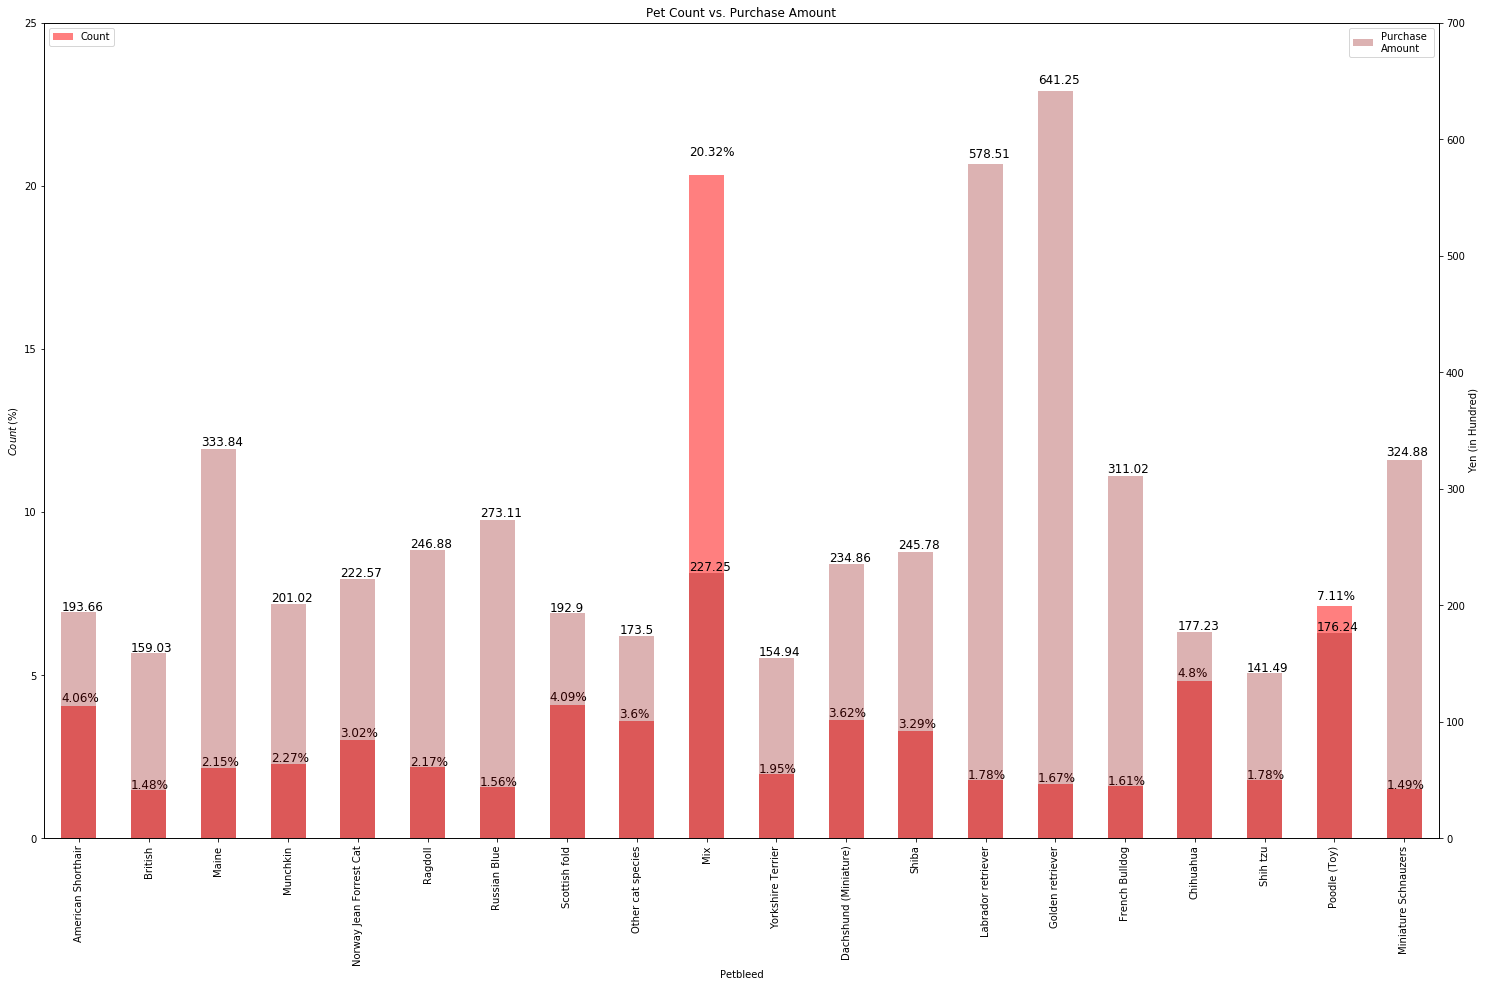

In [28]:
fig = plt.figure(figsize=(25,15))

ax2 = top20breed_data_mean["Count"].plot(kind = "bar", color = "red", alpha = 0.5, legend = True,
                                         title = "Pet Count vs. Purchase Amount",rot = 90)
ax = ax2.twinx()
ax = top20breed_data_mean["Purchase \nAmount"].plot(kind = "bar", color = "darkred",alpha = 0.3,legend = True)
ax2.legend(loc='upper left')
ax.legend(loc='upper right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01),fontsize=12)
for p in ax2.patches:
    ax2.annotate(str(p.get_height())+"%", (p.get_x() * 1, p.get_height() * 1.03),fontsize=12)

ax2.set_ylim([0,25])
ax.set_ylim([0,700])
ax.set_ylabel("Yen (in Hundred)");
ax2.set_ylabel('$Count \, (\%)$');


### Plotting Pet Count vs. Number of Purchase  for each Pet Breed

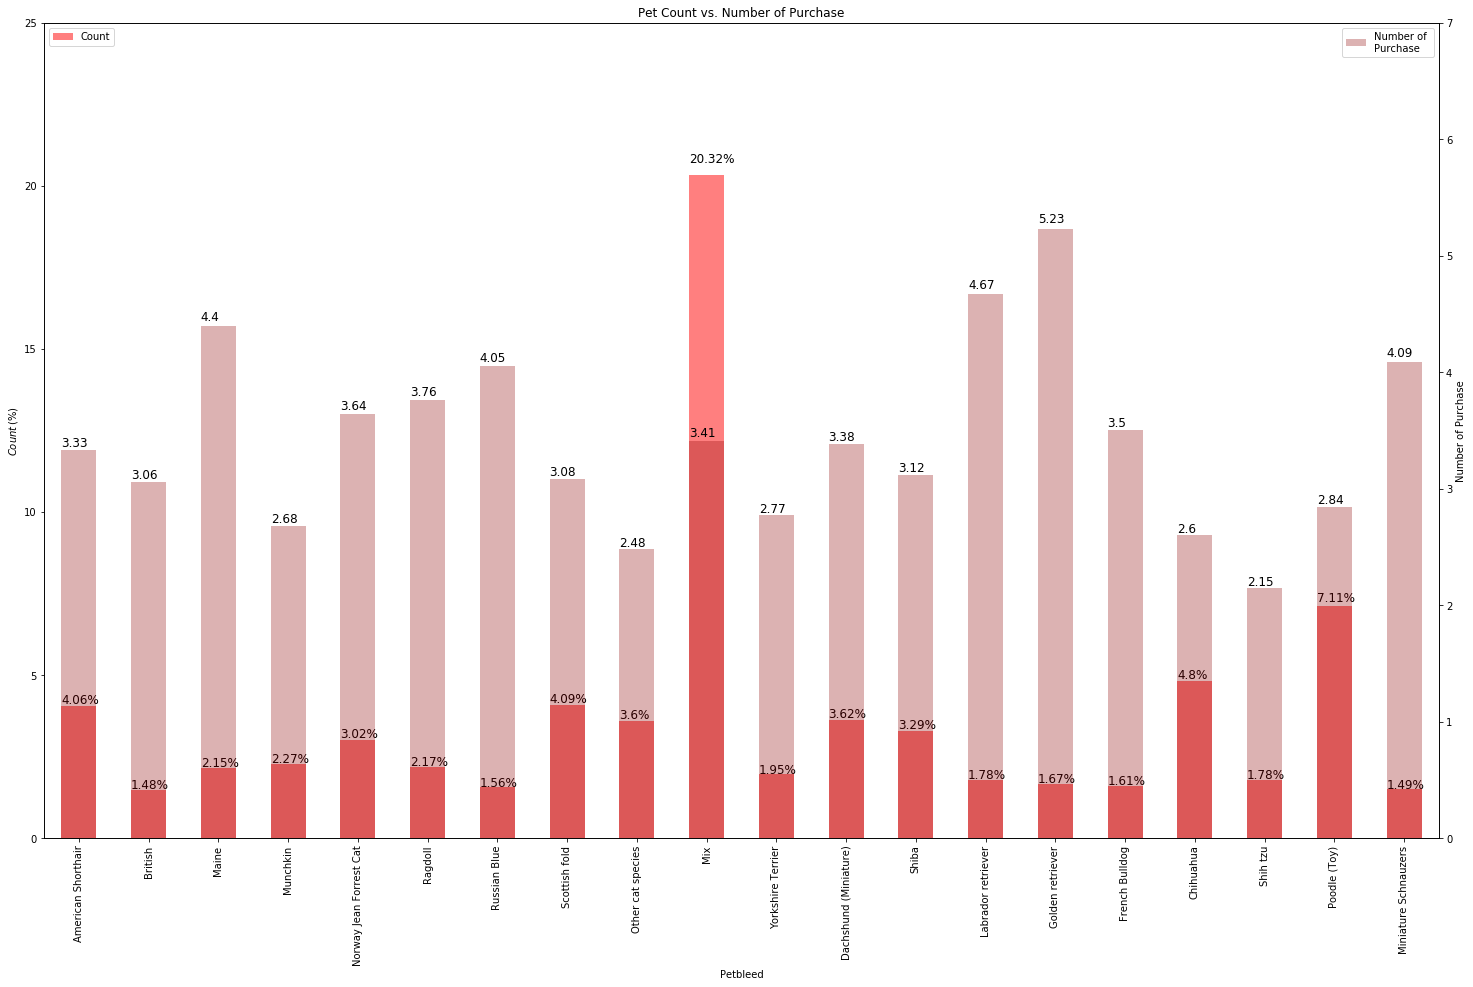

In [29]:
fig = plt.figure(figsize=(25,15))
                
ax2 = top20breed_data_mean["Count"].plot(kind = "bar", color = "red", alpha = 0.5, legend = True,title = "Pet Count vs. Number of Purchase")
ax = ax2.twinx()
ax = top20breed_data_mean['Number of \nPurchase'].plot(kind = "bar", color = "darkred",alpha = 0.3,legend = True)
ax2.legend(loc='upper left')
ax.legend(loc='upper right')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.01),fontsize=12)
for p in ax2.patches:
    ax2.annotate(str(p.get_height())+"%", (p.get_x() * 1, p.get_height() * 1.02),fontsize=12)

ax2.set_ylim([0,25])
ax.set_ylim([0,7])
ax.set_ylabel("Number of Purchase");
ax2.set_ylabel('$Count \, (\%)$');

## Positive Customers  
Definition: Top 10% in Purchase amount & Number of Purchase > 1

In [46]:
merged_total_data.nunique()

id                             9167
Postal Code                    6618
First_Two                       100
Gender                            2
Date of Birth                  3442
Number of \nPurchase             44
Purchase \nAmount              4988
Dog or Cat                        2
Petbleed                        145
Petsex                            3
Email Reception\nPermission       2
Place Name                     5875
Prefectures                      47
Districts                       962
Latitude                       4628
Longitude                      4768
dtype: int64

In [47]:
positive_customer = merged_total_data.sort_values(by = "Purchase \nAmount", ascending= False)
positive_customer = positive_customer.drop_duplicates(subset = "id", keep = "first")
positive_customer = positive_customer[:int(len(positive_customer)/10)]
positive_customer = positive_customer.reset_index(drop=True)
positive_customer = positive_customer[positive_customer["Number of \nPurchase"] != 1]
positive_customer

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude
0,37189,134-0084,13,2,NaN,21,1011742,1,60000000320,1,3,Higashikasai,Tokyo To,Edogawa Ku,35.6626,139.8795
1,10275,089-0352,8,1,11/13/42,31,623707,1,60000000299,1,3,Mikagenishi2-Jo,Hokkaido,Kamikawa Gun,43.4444,142.8018
2,1516,297-0065,29,2,12/7/55,42,617707,1,60000000288,2,3,Midorigaoka,Chiba Ken,Mobara Shi,35.4397,140.2589
3,15520,380-0958,38,1,NaN,35,565871,2,59900000001,2,1,Isemiya,Nagano Ken,Nagano Shi,36.6302,138.1689
4,3098,249-0005,24,2,4/14/68,36,545231,2,50000000047,2,3,Sakurayama,Kanagawa Ken,Zushi Shi,35.2921,139.5852
5,40065,989-6136,98,2,NaN,14,520510,1,60000000320,1,3,Furukawa Honami,Miyagi Ken,Osaki Shi,38.6054,140.9451
6,241,225-0023,22,1,NaN,204,519055,1,60000000144,2,3,Obacho,Kanagawa Ken,Yokohama Shi,35.5627,139.5332
7,1284,285-0818,28,2,NaN,55,510208,2,50000000004,1,1,Terazaki,Chiba Ken,Sakura Shi,35.6961,139.9391
8,4270,215-0003,21,2,3/7/67,56,506224,2,50000000032,2,1,Takaishi,Kanagawa Ken,Kawasaki Shi,35.6120,139.5199
9,10392,769-1504,76,2,7/16/57,26,503500,1,60000000158,2,1,Toyonakacho Kamidakano,Kagawa Ken,Mitoyo Shi,34.2239,133.6394


##### Check if Date of Birth information has any flaws

In [48]:
datelist_pos = list()
for item in positive_customer["Date of Birth"]:
    if pd.isna(item) == True:
        datelist_pos.append(item)
    else:
        year = item.split("/")[2]
        year = int(year)
        datelist_pos.append(year)

positive_customer["Birthday_Year"] = datelist_pos
positive_customer = positive_customer.sort_values(by = "Birthday_Year", ascending = True)
positive_customer.head(5)

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude,Birthday_Year
674,18357,156-0056,15,2,3/30/13,8,72017,2,50000000027,2,1,Hachimanyama,Tokyo To,Setagaya Ku,35.6646,139.6174,13.0
263,18199,621-0261,62,1,11/17/40,10,134350,1,60000000288,1,1,Hatanocho Sengahata,Kyoto Fu,Kameoka Shi,34.9637,135.5421,40.0
715,11201,354-0041,35,1,3/14/41,4,69022,2,50000000039,2,3,Fujikubo,Saitama Ken,Iruma Gun,35.8357,139.5312,41.0
710,3461,889-0616,88,1,6/30/41,9,69218,1,60000000501,1,1,Minamimachi,Miyazaki Ken,Higashiusuki Gun,32.4833,131.5833,41.0
554,18459,870-0251,87,1,8/27/41,12,82324,1,60000000133,1,3,Ozaichuo,Oita Ken,Oita Shi,33.2453,131.7199,41.0


1 ambiguous Date of Birth with 13 as birth year

In [49]:
positive_customer = positive_customer[1:]
positive_customer

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude,Birthday_Year
263,18199,621-0261,62,1,11/17/40,10,134350,1,60000000288,1,1,Hatanocho Sengahata,Kyoto Fu,Kameoka Shi,34.9637,135.5421,40.0
715,11201,354-0041,35,1,3/14/41,4,69022,2,50000000039,2,3,Fujikubo,Saitama Ken,Iruma Gun,35.8357,139.5312,41.0
710,3461,889-0616,88,1,6/30/41,9,69218,1,60000000501,1,1,Minamimachi,Miyazaki Ken,Higashiusuki Gun,32.4833,131.5833,41.0
554,18459,870-0251,87,1,8/27/41,12,82324,1,60000000133,1,3,Ozaichuo,Oita Ken,Oita Shi,33.2453,131.7199,41.0
1,10275,089-0352,8,1,11/13/42,31,623707,1,60000000299,1,3,Mikagenishi2-Jo,Hokkaido,Kamikawa Gun,43.4444,142.8018,42.0
711,9544,143-0011,14,1,12/21/42,17,69147,1,60000000115,1,1,Omorihoncho,Tokyo To,Ota Ku,35.5807,139.7372,42.0
479,12412,272-0014,27,2,11/4/42,15,91045,1,60000000115,1,1,Tajiri,Chiba Ken,Ichikawa Shi,35.7048,139.9332,42.0
468,21405,458-0846,45,2,2/13/43,15,91670,2,50000000041,1,1,Narumicho (Yakushiyama),Aichi Ken,Nagoya Shi,35.0583,136.9667,43.0
93,14162,639-2101,63,2,6/9/44,13,216086,1,60000000010,2,1,Hikida,Nara Ken,Katsuragi Shi,34.5053,135.7238,44.0
455,10354,520-2352,52,2,1/3/45,12,93764,1,60000000317,1,1,Tobaotsu,Shiga Ken,Yasu Shi,35.2500,135.9667,45.0


## Negative Customers 
Definition: Number of Purchase = 1 & Days Since Last purchase >  191 days & Days member Registration date > 855

In [50]:
data_negative = data_negative[['id','Postal Code','Gender','Date of Birth','First Purchase','Number of \nPurchase',
                               'Purchase \nAmount','Member\nRegistration Date','Member \nInformation Update',
                               'Unsubscribe','Email Reception\nPermission','Dog or Cat','Petbleed','Petsex',
                               'Allow mail\n Reception']]
data_negative

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,Email Reception Permission,Dog or Cat,Petbleed,Petsex,Allow mail Reception
0,43271,999-9992,2,NaN,NaN,0,0,9/30/17 13:10,9/30/17,0,1,2,59900000001,2,1
1,42088,994-9940,2,NaN,NaN,0,0,9/28/17 19:40,9/28/17,0,1,2,50000999999,2,1
2,22240,989-9892,2,1/22/77,NaN,0,0,3/11/17 7:16,3/11/17,0,3,2,59900000001,2,1
3,22240,989-9892,2,1/22/77,NaN,0,0,3/11/17 7:16,3/11/17,0,3,2,59900000001,1,1
4,22240,989-9892,2,1/22/77,NaN,0,0,3/11/17 7:16,3/11/17,0,3,2,59900000001,2,1
5,15860,981-9811,2,5/22/67,NaN,0,0,11/23/16 14:25,11/23/16,0,3,1,60000000320,1,1
6,37958,963-9638,2,NaN,NaN,0,0,9/13/17 9:40,9/13/17,0,1,2,59900000001,2,1
7,15528,959-9591,2,NaN,11/1/16 1:58,1,6480,11/1/16 1:48,11/1/16,0,3,1,60000000288,2,1
8,41982,955-9550,1,NaN,NaN,0,0,9/28/17 15:50,9/28/17,0,1,2,59900000001,1,1
9,22133,399-9511,2,NaN,NaN,0,0,3/8/17 10:05,3/8/17,0,1,1,60000000022,2,1


In [51]:
data_negative.nunique()

id                             56706
Postal Code                    25062
Gender                             3
Date of Birth                   6275
First Purchase                  9170
Number of \nPurchase              45
Purchase \nAmount               5000
Member\nRegistration Date      28344
Member \nInformation Update     1270
Unsubscribe                        2
Email Reception\nPermission        3
Dog or Cat                         2
Petbleed                         180
Petsex                             3
Allow mail\n Reception             2
dtype: int64

In [52]:
negative_customer = data_negative[data_negative["Number of \nPurchase"] == 1]
merged_negative = pd.merge(negative_customer,location_data, on ="Postal Code", how = "inner")
merged_negative = merged_negative.drop_duplicates(subset = "id", keep = "first")
merged_negative = merged_negative.reset_index(drop=True)
merged_negative["First Purchase"] = pd.to_datetime(merged_negative["First Purchase"])
merged_negative["Member\nRegistration Date"] = pd.to_datetime(merged_negative["Member\nRegistration Date"])
merged_negative

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,Email Reception Permission,Dog or Cat,Petbleed,Petsex,Allow mail Reception,Place Name,Prefectures,Districts,Latitude,Longitude
0,1117,399-9422,2,2/3/71,2015-01-09 17:53:00,1,8683,2015-01-09 17:52:00,1/9/15,0,1,1,60000000130,1,1,Chikuniotsu,Nagano Ken,Kitaazumi Gun,36.8286,137.9569
1,10374,399-9301,2,2/25/71,2016-03-31 08:07:00,1,6036,2016-03-31 08:04:00,3/31/16,0,3,1,60000000320,2,2,Hokujo,Nagano Ken,Kitaazumi Gun,36.8286,137.9569
2,53876,963-8872,2,NaN,2018-01-25 19:08:00,1,5675,2018-01-25 18:56:00,1/25/18,0,1,1,60000000130,1,1,Sakaemachi,Fukushima Ken,Koriyama Shi,37.5869,140.2289
3,1740,604-8862,2,9/16/78,2016-06-03 08:10:00,1,5847,2015-04-04 23:42:00,3/31/17,0,1,2,59900000001,2,1,Mibu Morimachi,Kyoto Fu,Kyoto Shi,34.9852,135.8385
4,48158,604-8862,2,NaN,2017-12-10 10:00:00,1,3556,2017-10-31 10:06:00,12/10/17,0,1,1,60000000115,2,1,Mibu Morimachi,Kyoto Fu,Kyoto Shi,34.9852,135.8385
5,27640,963-8851,1,NaN,2017-05-26 13:34:00,1,8495,2017-05-07 11:20:00,5/26/17,0,1,2,50000000032,2,1,Kaisei,Fukushima Ken,Koriyama Shi,37.3928,140.3555
6,36161,963-8851,1,NaN,2017-09-01 19:56:00,1,7791,2017-09-01 19:52:00,9/1/17,0,1,2,50000000032,2,2,Kaisei,Fukushima Ken,Koriyama Shi,37.3928,140.3555
7,55777,963-8851,2,NaN,2018-02-15 14:20:00,1,5948,2018-02-15 14:16:00,2/15/18,0,3,2,50000000041,1,1,Kaisei,Fukushima Ken,Koriyama Shi,37.3928,140.3555
8,15713,963-8846,1,12/18/60,2016-11-14 13:20:00,1,6167,2016-11-14 11:53:00,11/14/16,0,1,1,60000000299,1,1,Kurume,Fukushima Ken,Koriyama Shi,37.6090,139.8264
9,18169,963-8846,1,1/17/75,2016-11-28 22:55:00,1,2001,2016-11-28 22:52:00,11/28/16,0,1,1,60000000155,1,1,Kurume,Fukushima Ken,Koriyama Shi,37.6090,139.8264


In [53]:
refer_time = merged_negative["First Purchase"].max()
refer_time

Timestamp('2018-04-11 22:48:00')

Getting number of days for data filtering

In [54]:
merged_negative["Registered_duration"] = (refer_time - merged_negative["Member\nRegistration Date"]).dt.days
merged_negative["Days_since_last_purchase"] = (refer_time - merged_negative["First Purchase"]).dt.days 

print("Days_since_last_purchase(mean): ", (merged_negative["Days_since_last_purchase"]).mean())
print("Days_since_last_purchase(std): ",(merged_negative["Days_since_last_purchase"]).std())
print("Registered_duration(mean):",(merged_negative["Registered_duration"]).mean())
print("Registered_duration(std):",(merged_negative["Registered_duration"]).std())


Days_since_last_purchase(mean):  512.8289526085225
Days_since_last_purchase(std):  321.9438699855752
Registered_duration(mean): 530.9928315412186
Registered_duration(std): 325.8318509431105


In [55]:
merged_negative = merged_negative[merged_negative["Days_since_last_purchase"] > (512-321)]
merged_negative = merged_negative[merged_negative["Registered_duration"] > (855)]
merged_negative = merged_negative.reset_index(drop = True)
merged_negative

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,...,Petbleed,Petsex,Allow mail Reception,Place Name,Prefectures,Districts,Latitude,Longitude,Registered_duration,Days_since_last_purchase
0,1117,399-9422,2,2/3/71,2015-01-09 17:53:00,1,8683,2015-01-09 17:52:00,1/9/15,0,...,60000000130,1,1,Chikuniotsu,Nagano Ken,Kitaazumi Gun,36.8286,137.9569,1188,1188
1,1740,604-8862,2,9/16/78,2016-06-03 08:10:00,1,5847,2015-04-04 23:42:00,3/31/17,0,...,59900000001,2,1,Mibu Morimachi,Kyoto Fu,Kyoto Shi,34.9852,135.8385,1102,677
2,3791,078-8812,2,3/15/70,2015-09-15 11:48:00,1,10465,2015-09-14 18:48:00,9/14/15,0,...,60000000310,1,1,Midorigaokaminami2-Jo,Hokkaido,Asahikawa Shi,43.7390,142.3853,940,939
3,2589,640-8404,2,1/21/62,2015-06-09 14:06:00,1,2262,2015-06-09 14:01:00,6/9/15,0,...,60000000115,1,1,Minato,Wakayama Ken,Wakayama Shi,34.2152,135.1501,1037,1037
4,7267,606-8393,1,1/27/97,2015-12-02 15:36:00,1,2001,2015-12-02 15:04:00,12/2/15,0,...,60000000131,1,2,Higashitakeyacho,Kyoto Fu,Kyoto Shi,34.9852,135.8385,861,861
5,4237,640-8391,2,NaN,2015-10-17 19:58:00,1,5832,2015-10-17 19:55:00,10/17/15,0,...,59900000001,2,2,Kano,Wakayama Ken,Wakayama Shi,34.2485,135.1954,907,907
6,2119,931-8306,2,3/10/89,2015-05-05 20:22:00,1,5422,2015-05-05 20:19:00,5/5/15,0,...,60000000314,2,2,Yonedasuzukakedai,Toyama Ken,Toyama Shi,36.7357,137.2382,1072,1072
7,1588,614-8296,2,NaN,2015-03-24 16:12:00,1,1882,2015-03-24 15:59:00,3/24/15,0,...,69900000001,2,2,Kimmeidai Higashi,Kyoto Fu,Yawata Shi,34.8576,135.7278,1114,1114
8,2134,606-8294,2,4/3/67,2015-05-07 13:01:00,1,4064,2015-05-07 13:00:00,7/23/15,0,...,50000000041,1,2,Kitashirakawa Jizodanicho,Kyoto Fu,Kyoto Shi,34.9852,135.8385,1070,1070
9,2983,078-8244,2,3/24/80,2015-08-28 12:43:00,1,897,2015-07-09 14:41:00,7/9/15,0,...,60000000314,1,1,Toyoka 14-Jo,Hokkaido,Asahikawa Shi,43.7390,142.3853,1007,957


In [56]:
merged_negative.nunique()

id                             950
Postal Code                    908
Gender                           2
Date of Birth                  606
First Purchase                 949
Number of \nPurchase             1
Purchase \nAmount              544
Member\nRegistration Date      943
Member \nInformation Update    430
Unsubscribe                      2
Email Reception\nPermission      2
Dog or Cat                       2
Petbleed                        79
Petsex                           2
Allow mail\n Reception           2
Place Name                     873
Prefectures                     47
Districts                      399
Latitude                       839
Longitude                      841
Registered_duration            353
Days_since_last_purchase       418
dtype: int64

In [57]:
datelist_neg = list()
for item in merged_negative["Date of Birth"]:
    if pd.isna(item) == True:
        datelist_neg.append(item)
    else:
        year = item.split("/")[2]
        year = int(year)
        datelist_neg.append(year)

merged_negative["Birthday_Year"] = datelist_neg
merged_negative = merged_negative.sort_values(by = "Birthday_Year", ascending = True)
merged_negative.head(5)

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,...,Petsex,Allow mail Reception,Place Name,Prefectures,Districts,Latitude,Longitude,Registered_duration,Days_since_last_purchase,Birthday_Year
650,2113,318-0033,2,10/7/01,2015-05-05 12:19:00,1,2584,2015-05-05 12:16:00,5/5/15,0,...,2,2,Honcho,Ibaraki Ken,Takahagi Shi,36.7167,140.7167,1072,1072,1.0
188,4362,990-0885,1,8/31/06,2016-01-10 23:05:00,1,542,2015-10-25 21:19:00,10/25/15,0,...,2,1,Shimakita,Yamagata Ken,Yamagata Shi,38.2978,140.2978,899,821,6.0
686,3658,446-0027,2,1/30/07,2016-02-01 18:02:00,1,5985,2015-09-04 18:10:00,9/4/15,0,...,1,1,Tomeicho,Aichi Ken,Anjo Shi,35.0023,137.1366,950,800,7.0
891,3112,184-0003,1,6/13/34,2015-07-20 09:20:00,1,5411,2015-07-20 09:15:00,7/20/15,0,...,1,1,Midoricho,Tokyo To,Koganei Shi,35.7058,139.5162,996,996,34.0
217,2565,002-0855,2,12/17/34,2015-06-07 10:49:00,1,4034,2015-06-07 10:48:00,6/7/15,0,...,2,2,Tonden 5-Jo,Hokkaido,Sapporo Shi,42.8557,142.3432,1039,1039,34.0


3 ambiguous Date of Birth data with year of births (01,06,07)

In [58]:
merged_negative = merged_negative[3:]
merged_negative.head()

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,...,Petsex,Allow mail Reception,Place Name,Prefectures,Districts,Latitude,Longitude,Registered_duration,Days_since_last_purchase,Birthday_Year
891,3112,184-0003,1,6/13/34,2015-07-20 09:20:00,1,5411,2015-07-20 09:15:00,7/20/15,0,...,1,1,Midoricho,Tokyo To,Koganei Shi,35.7058,139.5162,996,996,34.0
217,2565,002-0855,2,12/17/34,2015-06-07 10:49:00,1,4034,2015-06-07 10:48:00,6/7/15,0,...,2,2,Tonden 5-Jo,Hokkaido,Sapporo Shi,42.8557,142.3432,1039,1039,34.0
373,1254,519-0162,1,6/5/36,2015-02-02 12:10:00,1,7711,2015-02-02 12:03:00,2/2/15,0,...,2,1,Sumiyamacho,Mie Ken,Kameyama Shi,34.8687,136.4407,1164,1164,36.0
21,2903,614-8014,1,10/18/38,2016-01-26 23:11:00,1,824,2015-07-03 12:15:00,10/29/15,0,...,1,2,Yawata Kitaura,Kyoto Fu,Yawata Shi,34.8655,135.7200,1013,805,38.0
626,4495,276-0036,1,7/15/42,2015-11-04 20:48:00,1,6037,2015-11-04 17:48:00,4/27/17,0,...,2,1,Takazu(Sonota),Chiba Ken,Yachiyo Shi,35.6668,140.0504,889,889,42.0


In [59]:
positive_customer_pet15 = (positive_customer["Petbleed"].value_counts()[:12]).to_frame()
positive_customer_pet15 = positive_customer_pet15.rename({"Petbleed" : "Count"}, axis= "columns")
positive_customer_pet15.index.name = 'Pet Breed'

negative_customer_pet15 = (negative_customer["Petbleed"].value_counts()[:12]).to_frame()
negative_customer_pet15 = negative_customer_pet15.rename({"Petbleed" : "Count"}, axis= "columns")
negative_customer_pet15.index.name = 'Pet Breed'

pet_15_merge = pd.merge(positive_customer_pet15, negative_customer_pet15, how = "outer", left_index=True , right_index= True)
pet_15_merge = pet_15_merge.rename({"Count_x" : "Positive","Count_y" : "Negative"}, axis= "columns")
pet_15_merge = pet_15_merge.rename({
50000000004:"American Shorthair",
50000000010:"British", 
50000000029:"Maine", 
50000000031:"Munchkin", 
50000000032:"Norway Jean Forrest Cat",
50000000038:"Ragdoll", 
50000000039:"Russian Blue", 
50000000041:"Scottish fold", 
50000999999:"Other cat species", 
59900000001:"Mix",
60000000115:"Yorkshire Terrier",
60000000130:"Dachshund (Miniature)",
60000000133:"Shiba", 
60000000288:"Labrador retriever", 
60000000299:"Golden retriever",
60000000310:"French Bulldog", 
60000000320:"Chihuahua", 
60000000324:"Shih tzu", 
60000000506:"Poodle (Toy)", 
60000000525:"Miniature Schnauzers",
60000000063:"Barney's Mountain Dog",
60000000075:"Bulldog",
60000000314:"Maltese",
69900000002:"Mix-Samll(1-10kg)"}, axis = "index")
pet_15_merge["Positive"] = (pet_15_merge["Positive"]/914)*100
pet_15_merge["Negative"] = (pet_15_merge["Negative"]/947)*100
pet_15_merge.sort_values(by = ["Negative","Positive"], ascending = False)

,Positive,Negative
Pet Breed,,
Mix,14.660832,140.443506
Poodle (Toy),4.704595,51.847941
Chihuahua,NaN,32.418163
American Shorthair,2.954048,28.722281
Scottish fold,2.625821,25.448786
Other cat species,NaN,25.343189
Dachshund (Miniature),4.157549,24.287223
Shiba,4.048140,21.752904
Norway Jean Forrest Cat,2.078775,20.485744


### Add Age to both positive and negative

##### Positive

In [60]:
pos_age_in_year = list()
for item in positive_customer["Date of Birth"]:
    if pd.isna(item) == True:
        pos_age_in_year.append(item)
    else:
        mon = item.split("/")[0]
        day = item.split("/")[1]
        year = "19" + item[-2:]
        full = mon + "/" + day + "/" + year
        pos_age_in_year.append(full)
        
positive_customer["Date of Birth"] = pd.to_datetime(pos_age_in_year)

diff_in_days = (refer_time - positive_customer["Date of Birth"])
Age_in_year = (diff_in_days /pd.Timedelta(days=365))
positive_customer["Age_in_Years"] = Age_in_year

positive_customer

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude,Birthday_Year,Age_in_Years
263,18199,621-0261,62,1,1940-11-17,10,134350,1,60000000288,1,1,Hatanocho Sengahata,Kyoto Fu,Kameoka Shi,34.9637,135.5421,40.0,77.451918
715,11201,354-0041,35,1,1941-03-14,4,69022,2,50000000039,2,3,Fujikubo,Saitama Ken,Iruma Gun,35.8357,139.5312,41.0,77.131370
710,3461,889-0616,88,1,1941-06-30,9,69218,1,60000000501,1,1,Minamimachi,Miyazaki Ken,Higashiusuki Gun,32.4833,131.5833,41.0,76.835479
554,18459,870-0251,87,1,1941-08-27,12,82324,1,60000000133,1,3,Ozaichuo,Oita Ken,Oita Shi,33.2453,131.7199,41.0,76.676575
1,10275,089-0352,8,1,1942-11-13,31,623707,1,60000000299,1,3,Mikagenishi2-Jo,Hokkaido,Kamikawa Gun,43.4444,142.8018,42.0,75.462877
711,9544,143-0011,14,1,1942-12-21,17,69147,1,60000000115,1,1,Omorihoncho,Tokyo To,Ota Ku,35.5807,139.7372,42.0,75.358767
479,12412,272-0014,27,2,1942-11-04,15,91045,1,60000000115,1,1,Tajiri,Chiba Ken,Ichikawa Shi,35.7048,139.9332,42.0,75.487534
468,21405,458-0846,45,2,1943-02-13,15,91670,2,50000000041,1,1,Narumicho (Yakushiyama),Aichi Ken,Nagoya Shi,35.0583,136.9667,43.0,75.210822
93,14162,639-2101,63,2,1944-06-09,13,216086,1,60000000010,2,1,Hikida,Nara Ken,Katsuragi Shi,34.5053,135.7238,44.0,73.890274
455,10354,520-2352,52,2,1945-01-03,12,93764,1,60000000317,1,1,Tobaotsu,Shiga Ken,Yasu Shi,35.2500,135.9667,45.0,73.320411


##### Negative

In [61]:
neg_age_in_year = list()
for item in merged_negative["Date of Birth"]:
    if pd.isna(item) == True:
        neg_age_in_year.append(item)
    else:
        mon = item.split("/")[0]
        day = item.split("/")[1]
        year = "19" + item[-2:]
        full = mon + "/" + day + "/" + year
        neg_age_in_year.append(full)
        
merged_negative["Date of Birth"] = pd.to_datetime(neg_age_in_year)

diff_in_days = (refer_time - merged_negative["Date of Birth"])
Age_in_year = (diff_in_days / pd.Timedelta(days=365))
merged_negative["Age_in_Years"] = Age_in_year

merged_negative

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,...,Allow mail Reception,Place Name,Prefectures,Districts,Latitude,Longitude,Registered_duration,Days_since_last_purchase,Birthday_Year,Age_in_Years
891,3112,184-0003,1,1934-06-13,2015-07-20 09:20:00,1,5411,2015-07-20 09:15:00,7/20/15,0,...,1,Midoricho,Tokyo To,Koganei Shi,35.7058,139.5162,996,996,34.0,83.887534
217,2565,002-0855,2,1934-12-17,2015-06-07 10:49:00,1,4034,2015-06-07 10:48:00,6/7/15,0,...,2,Tonden 5-Jo,Hokkaido,Sapporo Shi,42.8557,142.3432,1039,1039,34.0,83.375205
373,1254,519-0162,1,1936-06-05,2015-02-02 12:10:00,1,7711,2015-02-02 12:03:00,2/2/15,0,...,1,Sumiyamacho,Mie Ken,Kameyama Shi,34.8687,136.4407,1164,1164,36.0,81.906712
21,2903,614-8014,1,1938-10-18,2016-01-26 23:11:00,1,824,2015-07-03 12:15:00,10/29/15,0,...,2,Yawata Kitaura,Kyoto Fu,Yawata Shi,34.8655,135.7200,1013,805,38.0,79.536849
626,4495,276-0036,1,1942-07-15,2015-11-04 20:48:00,1,6037,2015-11-04 17:48:00,4/27/17,0,...,1,Takazu(Sonota),Chiba Ken,Yachiyo Shi,35.6668,140.0504,889,889,42.0,75.794384
251,3536,801-0831,1,1942-01-01,2015-08-24 08:24:00,1,6070,2015-08-24 08:22:00,8/24/15,0,...,1,Maruyama,Fukuoka Ken,Kitakyushu Shi,33.9360,130.9667,961,961,42.0,76.328630
174,2577,254-0911,1,1942-02-28,2015-06-07 20:38:00,1,10649,2015-06-07 20:34:00,11/4/15,0,...,1,Yamashita,Kanagawa Ken,Hiratsuka Shi,35.3298,139.3161,1039,1039,42.0,76.169726
73,2053,379-2314,1,1943-09-21,2015-04-30 15:41:00,1,3211,2015-04-30 15:32:00,4/30/15,0,...,2,Kasakakecho Saishikada,Gumma Ken,Midori Shi,36.4004,139.2584,1077,1077,43.0,74.608082
570,2614,020-0045,1,1944-03-12,2015-06-11 21:45:00,1,3416,2015-06-11 21:41:00,6/11/15,0,...,1,Moriokaekinishitori,Iwate Ken,Morioka Shi,39.7009,141.1334,1035,1035,44.0,74.134110
765,7840,360-0018,1,1944-01-15,2015-12-06 21:20:00,1,3556,2015-12-06 21:16:00,12/6/15,0,...,2,Chuo,Saitama Ken,Kumagaya Shi,36.1579,139.3933,857,857,44.0,74.290274


In [62]:
negative_customer = merged_negative

Positive Male %:  36.543
Positive Female %:  63.457
Total:  100.0
 
Negative Male %:  28.511
Negative Female %:  71.489
Total:  100.0


Text(0,0.5,'Percent')

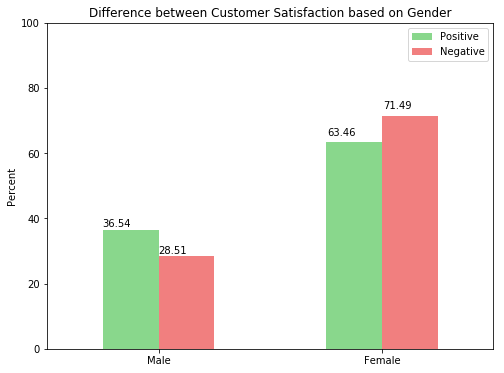

In [63]:
Positive_male_percent = (((positive_customer["Gender"]==1).sum())/len(positive_customer))*100
Positive_female_percent = (((positive_customer["Gender"]==2).sum())/len(positive_customer))*100
Negative_male_percent = (((negative_customer["Gender"]==1).sum())/len(negative_customer))*100
Negative_female_percent = (((negative_customer["Gender"]==2).sum())/len(negative_customer))*100
print("Positive Male %: ", Positive_male_percent.round(3))
print("Positive Female %: ", Positive_female_percent.round(3))
print("Total: ", Positive_male_percent+Positive_female_percent)
print(" ")
print("Negative Male %: ", Negative_male_percent.round(3))
print("Negative Female %: ", Negative_female_percent.round(3))
print("Total: ", Negative_male_percent+Negative_female_percent)

d = {"Positive":[Positive_male_percent,Positive_female_percent],
     "Negative":[Negative_male_percent,Negative_female_percent]}

percent_dataframe = DataFrame(d,columns =["Positive","Negative"],
                             index = ["Male","Female"]).round(2)
percent_dataframe.loc["Total"] = percent_dataframe.sum()

hist_MorF = percent_dataframe[:2].plot(kind = "bar", color = ["xkcd:green","xkcd:red"], 
                                       alpha = 0.5, figsize=(8,6), rot = 0,
                                      title = "Difference between Customer Satisfaction based on Gender")

for p in hist_MorF.patches:
    hist_MorF.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.03))
hist_MorF.set_ylim([0.0,100])
hist_MorF.set_ylabel("Percent")

## GEO Anaylsis

The red bars show the prefectures where the negative customer is predominate while the green bar show prefectures where positive customer is redominate

Text(0,0.5,'Percent Difference')

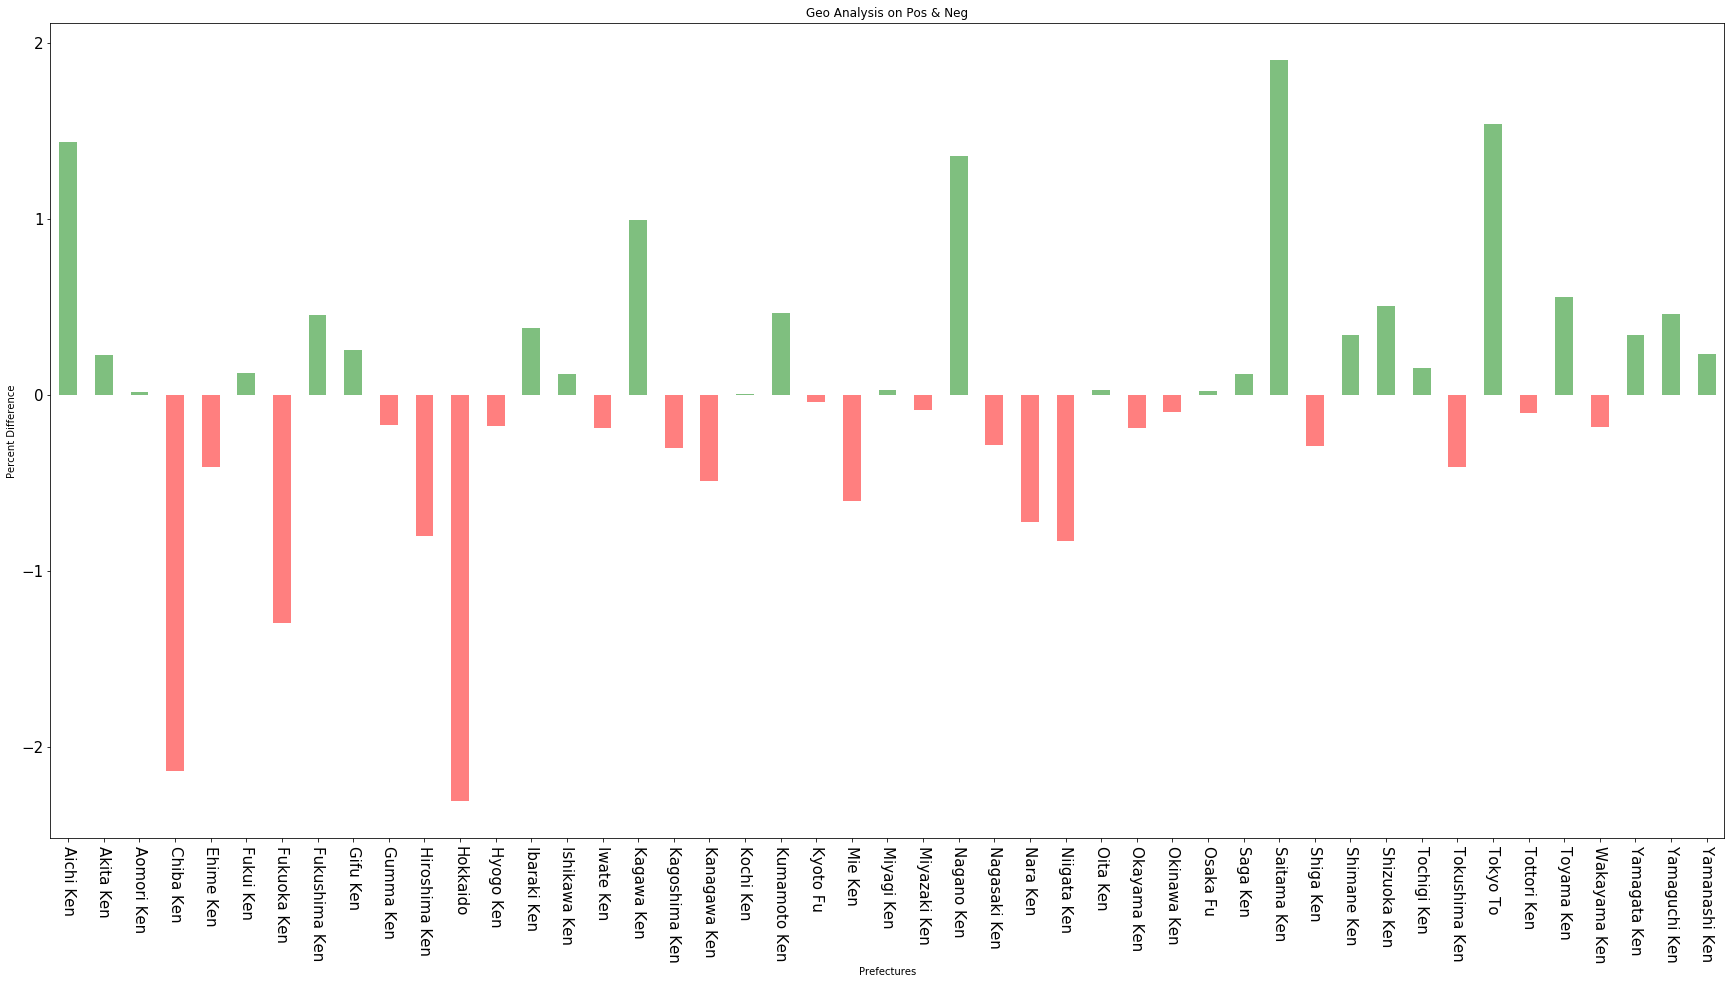

In [64]:
pos_pref = positive_customer["Prefectures"].value_counts().to_frame()
pos_pref = pos_pref.rename({"Prefectures" : "Count Percent"}, axis= "columns")
pos_pref.index.name = 'Prefectures'
pos_pref["Count Percent"] = ((pos_pref["Count Percent"]/len(positive_customer["Prefectures"]))*100).round(3)

neg_pref = negative_customer["Prefectures"].value_counts().to_frame()
neg_pref = neg_pref.rename({"Prefectures" : "Count Percent"}, axis= "columns")
neg_pref.index.name = 'Prefectures'
neg_pref["Count Percent"] = ((neg_pref["Count Percent"]/len(negative_customer["Prefectures"]))*100).round(3)

pref_merge = pd.merge(pos_pref,neg_pref,how="outer",left_index=True,right_index=True)
pref_merge = pref_merge.rename({"Count Percent_x" : "Positive","Count Percent_y":"Negative"}, axis= "columns")

pref_merge["Difference"] = pref_merge["Positive"]  - pref_merge["Negative"]
hist = pref_merge["Difference"].plot(kind = "bar", figsize=(30,15),
                              color=pref_merge.Difference.apply(lambda x: 'green' if x > 0 else 'red'),
                             alpha = 0.5, fontsize = 15, title = "Geo Analysis on Pos & Neg",rot = -90)
hist.set_ylabel("Percent Difference")

In [65]:
pref_merge.sort_values(by = "Positive", ascending = False)

,Positive,Negative,Difference
Prefectures,,,
Tokyo To,22.976,21.436,1.540
Kanagawa Ken,10.284,10.771,-0.487
Osaka Fu,6.783,6.758,0.025
Saitama Ken,6.127,4.224,1.903
Chiba Ken,5.470,7.603,-2.133
Aichi Ken,4.923,3.485,1.438
Hyogo Ken,4.048,4.224,-0.176
Hokkaido,3.501,5.808,-2.307
Nagano Ken,2.626,1.267,1.359


Showing prefectures with top positivity & negativity

In [66]:
print("Prefectures with highest positivity")
print(pref_merge["Difference"].sort_values(ascending = False)[:4])
print("------------------------------")
print("Prefectures with highest negativity")
print((pref_merge["Difference"].sort_values(ascending = True)[:4]))

Prefectures with highest positivity
Prefectures
Saitama Ken    1.903
Tokyo To       1.540
Aichi Ken      1.438
Nagano Ken     1.359
Name: Difference, dtype: float64
------------------------------
Prefectures with highest negativity
Prefectures
Hokkaido      -2.307
Chiba Ken     -2.133
Fukuoka Ken   -1.297
Niigata Ken   -0.829
Name: Difference, dtype: float64


## Age Distribution Analysis

Divide the customers based on age groups

In [67]:
age_group = list()
for item in positive_customer["Age_in_Years"]:
    if pd.isna(item) == True:
        age_group.append(item)
    elif item < 20:
        age_group.append("teens")
    elif 20 < item < 30:
        age_group.append("twenties")
    elif 30 < item < 40:
        age_group.append("thirties")
    elif 40 < item < 50:
        age_group.append("forties")
    elif 50 < item < 60:
        age_group.append("fifties")
    elif 60 < item < 70:
        age_group.append("sixties")
    elif 70 < item < 80:
        age_group.append("seventies")
    elif 80 < item < 90:
        age_group.append("eighties")
    elif 90 < item < 100:
        age_group.append("nineties")
positive_customer["Age_group"] = age_group
positive_customer

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude,Birthday_Year,Age_in_Years,Age_group
263,18199,621-0261,62,1,1940-11-17,10,134350,1,60000000288,1,1,Hatanocho Sengahata,Kyoto Fu,Kameoka Shi,34.9637,135.5421,40.0,77.451918,seventies
715,11201,354-0041,35,1,1941-03-14,4,69022,2,50000000039,2,3,Fujikubo,Saitama Ken,Iruma Gun,35.8357,139.5312,41.0,77.131370,seventies
710,3461,889-0616,88,1,1941-06-30,9,69218,1,60000000501,1,1,Minamimachi,Miyazaki Ken,Higashiusuki Gun,32.4833,131.5833,41.0,76.835479,seventies
554,18459,870-0251,87,1,1941-08-27,12,82324,1,60000000133,1,3,Ozaichuo,Oita Ken,Oita Shi,33.2453,131.7199,41.0,76.676575,seventies
1,10275,089-0352,8,1,1942-11-13,31,623707,1,60000000299,1,3,Mikagenishi2-Jo,Hokkaido,Kamikawa Gun,43.4444,142.8018,42.0,75.462877,seventies
711,9544,143-0011,14,1,1942-12-21,17,69147,1,60000000115,1,1,Omorihoncho,Tokyo To,Ota Ku,35.5807,139.7372,42.0,75.358767,seventies
479,12412,272-0014,27,2,1942-11-04,15,91045,1,60000000115,1,1,Tajiri,Chiba Ken,Ichikawa Shi,35.7048,139.9332,42.0,75.487534,seventies
468,21405,458-0846,45,2,1943-02-13,15,91670,2,50000000041,1,1,Narumicho (Yakushiyama),Aichi Ken,Nagoya Shi,35.0583,136.9667,43.0,75.210822,seventies
93,14162,639-2101,63,2,1944-06-09,13,216086,1,60000000010,2,1,Hikida,Nara Ken,Katsuragi Shi,34.5053,135.7238,44.0,73.890274,seventies
455,10354,520-2352,52,2,1945-01-03,12,93764,1,60000000317,1,1,Tobaotsu,Shiga Ken,Yasu Shi,35.2500,135.9667,45.0,73.320411,seventies


In [68]:
age_group_neg = list()
for item in negative_customer["Age_in_Years"]:
    if pd.isna(item) == True:
        age_group_neg.append(item)
    elif item < 20:
        age_group_neg.append("teens")
    elif 20 < item < 30:
        age_group_neg.append("twenties")
    elif 30 < item < 40:
        age_group_neg.append("thirties")
    elif 40 < item < 50:
        age_group_neg.append("forties")
    elif 50 < item < 60:
        age_group_neg.append("fifties")
    elif 60 < item < 70:
        age_group_neg.append("sixties")
    elif 70 < item < 80:
        age_group_neg.append("seventies")
    elif 80 < item < 90:
        age_group_neg.append("eighties")
    elif 90 < item < 100:
        age_group_neg.append("nineties")
negative_customer["Age_group"] = age_group_neg
negative_customer

,id,Postal Code,Gender,Date of Birth,First Purchase,Number of Purchase,Purchase Amount,Member Registration Date,Member Information Update,Unsubscribe,...,Place Name,Prefectures,Districts,Latitude,Longitude,Registered_duration,Days_since_last_purchase,Birthday_Year,Age_in_Years,Age_group
891,3112,184-0003,1,1934-06-13,2015-07-20 09:20:00,1,5411,2015-07-20 09:15:00,7/20/15,0,...,Midoricho,Tokyo To,Koganei Shi,35.7058,139.5162,996,996,34.0,83.887534,eighties
217,2565,002-0855,2,1934-12-17,2015-06-07 10:49:00,1,4034,2015-06-07 10:48:00,6/7/15,0,...,Tonden 5-Jo,Hokkaido,Sapporo Shi,42.8557,142.3432,1039,1039,34.0,83.375205,eighties
373,1254,519-0162,1,1936-06-05,2015-02-02 12:10:00,1,7711,2015-02-02 12:03:00,2/2/15,0,...,Sumiyamacho,Mie Ken,Kameyama Shi,34.8687,136.4407,1164,1164,36.0,81.906712,eighties
21,2903,614-8014,1,1938-10-18,2016-01-26 23:11:00,1,824,2015-07-03 12:15:00,10/29/15,0,...,Yawata Kitaura,Kyoto Fu,Yawata Shi,34.8655,135.7200,1013,805,38.0,79.536849,seventies
626,4495,276-0036,1,1942-07-15,2015-11-04 20:48:00,1,6037,2015-11-04 17:48:00,4/27/17,0,...,Takazu(Sonota),Chiba Ken,Yachiyo Shi,35.6668,140.0504,889,889,42.0,75.794384,seventies
251,3536,801-0831,1,1942-01-01,2015-08-24 08:24:00,1,6070,2015-08-24 08:22:00,8/24/15,0,...,Maruyama,Fukuoka Ken,Kitakyushu Shi,33.9360,130.9667,961,961,42.0,76.328630,seventies
174,2577,254-0911,1,1942-02-28,2015-06-07 20:38:00,1,10649,2015-06-07 20:34:00,11/4/15,0,...,Yamashita,Kanagawa Ken,Hiratsuka Shi,35.3298,139.3161,1039,1039,42.0,76.169726,seventies
73,2053,379-2314,1,1943-09-21,2015-04-30 15:41:00,1,3211,2015-04-30 15:32:00,4/30/15,0,...,Kasakakecho Saishikada,Gumma Ken,Midori Shi,36.4004,139.2584,1077,1077,43.0,74.608082,seventies
570,2614,020-0045,1,1944-03-12,2015-06-11 21:45:00,1,3416,2015-06-11 21:41:00,6/11/15,0,...,Moriokaekinishitori,Iwate Ken,Morioka Shi,39.7009,141.1334,1035,1035,44.0,74.134110,seventies
765,7840,360-0018,1,1944-01-15,2015-12-06 21:20:00,1,3556,2015-12-06 21:16:00,12/6/15,0,...,Chuo,Saitama Ken,Kumagaya Shi,36.1579,139.3933,857,857,44.0,74.290274,seventies


In [69]:
print("POSITIVE")
print(positive_customer["Age_group"].value_counts())
print("-----------------------------")
print("NEGATIVE")
print(negative_customer["Age_group"].value_counts())

POSITIVE
fifties      137
forties      113
sixties       67
thirties      66
twenties      29
seventies     22
teens          1
Name: Age_group, dtype: int64
-----------------------------
NEGATIVE
fifties      185
forties      184
thirties      92
sixties       78
twenties      56
seventies     25
eighties       3
teens          1
Name: Age_group, dtype: int64


Positive


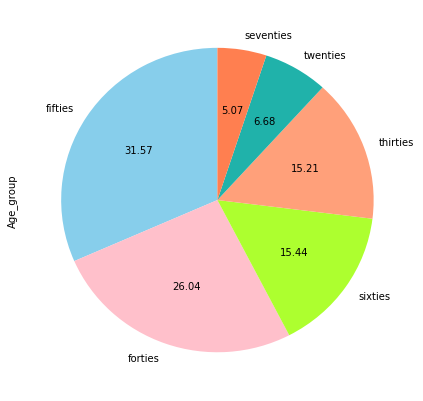

Negative


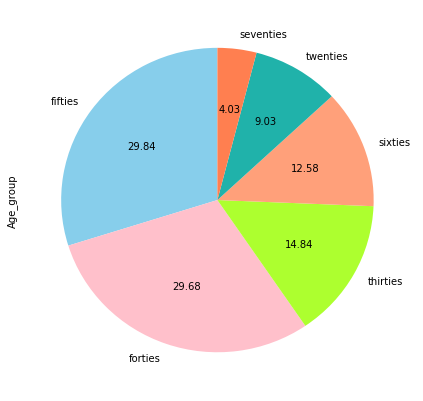

In [70]:
print("Positive")
positive_customer["Age_group"].value_counts()[:6].plot.pie(y = "Age_group",
                                                           colors = ["skyblue","pink",
                                                                     "greenyellow","lightsalmon",
                                                                     "lightseagreen","coral"],startangle=90,
                                                           figsize = (7,7),
                                                           autopct='%.2f', fontsize=10);
plt.show()
print("Negative")
negative_customer["Age_group"].value_counts()[:6].plot.pie(y = "Age_group",
                                                           colors = ["skyblue","pink",
                                                                     "greenyellow","lightsalmon",
                                                                     "lightseagreen","coral"],startangle=90,
                                                           figsize = (7,7),
                                                           autopct='%.2f', fontsize=10);


In [71]:
positive_customer_male = positive_customer[positive_customer["Gender"] == 1]
positive_customer_female = positive_customer[positive_customer["Gender"] == 2]
negative_customer_male = negative_customer[negative_customer["Gender"] == 1]
negative_customer_female = negative_customer[negative_customer["Gender"] == 2]
positive_total = (positive_customer_male["Age_group"].notnull()).sum() + (positive_customer_female["Age_group"].notnull()).sum()
negative_total = (negative_customer_male["Age_group"].notnull()).sum() + (negative_customer_female["Age_group"].notnull()).sum()
positive_total

435

In [72]:
positive_male_df = ((positive_customer_male["Age_group"].value_counts())/positive_total).to_frame()
positive_male_df = positive_male_df.rename({"Age_group":"Pos Male Count"}, axis = "columns")
positive_male_df.index.name = "Age Group"

positive_female_df = ((positive_customer_female["Age_group"].value_counts())/positive_total).to_frame()
positive_female_df = positive_female_df.rename({"Age_group":"Pos Female Count"}, axis = "columns")
positive_female_df.index.name = "Age Group"

negative_male_df = ((negative_customer_male["Age_group"].value_counts())/negative_total).to_frame()
negative_male_df = negative_male_df.rename({"Age_group":"Neg Male Count"}, axis = "columns")
negative_male_df.index.name = "Age Group"

negative_female_df = ((negative_customer_female["Age_group"].value_counts())/negative_total).to_frame()
negative_female_df = negative_female_df.rename({"Age_group":"Neg Female Count"}, axis = "columns")
negative_female_df.index.name = "Age Group"

pos_gender_merge = pd.merge(positive_male_df,positive_female_df, how = "outer",right_index=True, left_index=True)
neg_gender_merge = pd.merge(negative_male_df,negative_female_df, how = "outer",right_index=True, left_index=True)
all_gender_merge = pd.merge(pos_gender_merge,neg_gender_merge, how = "outer",right_index=True, left_index=True)
all_gender_merge = ((all_gender_merge.fillna(value = 0))*100).round(2)
all_gender_merge = all_gender_merge.reindex(["teens",'twenties',"thirties","forties","fifties",
                                             "sixties","seventies","eighties"])
all_gender_merge

,Pos Male Count,Pos Female Count,Neg Male Count,Neg Female Count
Age Group,,,,
teens,0.00,0.23,0.00,0.16
twenties,1.84,4.83,1.76,7.21
thirties,6.44,8.74,3.37,11.38
forties,8.74,17.24,7.37,22.12
fifties,10.11,21.38,8.49,21.15
sixties,7.36,8.05,4.81,7.69
seventies,2.99,2.07,2.72,1.28
eighties,0.00,0.00,0.32,0.16


Text(0,0.5,'$Count \\, (\\%)$')

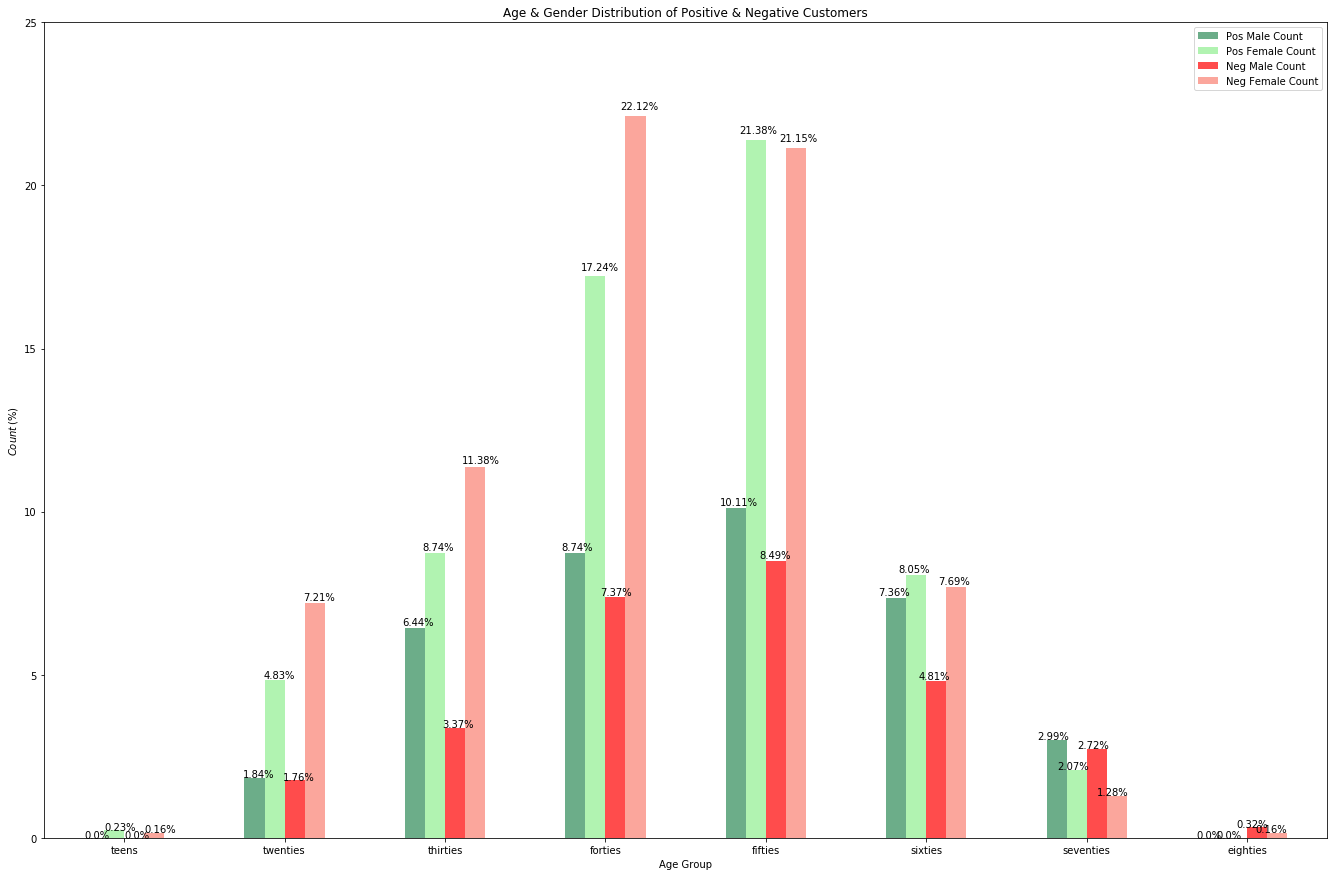

In [73]:
hist = all_gender_merge.plot(kind = "bar", color = ["seagreen","lightgreen","red","salmon"],
                        alpha = 0.7, figsize=(23,15), rot = 0,
                        title = "Age & Gender Distribution of Positive & Negative Customers")

for p in hist.patches:
    hist.annotate(str(p.get_height())+"%", (p.get_x()*0.99, p.get_height()*1.01))
hist.set_ylim(0.0,25)
hist.set_ylabel("Percent")
hist.set_ylabel('$Count \, (\%)$')

In [74]:
all_gender_merge

,Pos Male Count,Pos Female Count,Neg Male Count,Neg Female Count
Age Group,,,,
teens,0.00,0.23,0.00,0.16
twenties,1.84,4.83,1.76,7.21
thirties,6.44,8.74,3.37,11.38
forties,8.74,17.24,7.37,22.12
fifties,10.11,21.38,8.49,21.15
sixties,7.36,8.05,4.81,7.69
seventies,2.99,2.07,2.72,1.28
eighties,0.00,0.00,0.32,0.16


In [77]:
positive_M_customer_for_count = positive_customer[positive_customer["Gender"] == 1]
positive_M_customer_for_count = positive_M_customer_for_count.groupby(["Age_group", "Prefectures"]).sum()
positive_M_customer_for_count.sort_values(['id'], ascending = False)

,,id,First_Two,Gender,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Latitude,Longitude,Birthday_Year,Age_in_Years
Age_group,Prefectures,,,,,,,,,,,,,
fifties,Tokyo To,89821,128,8,130,1460770,11,459900001451,12,14,285.4828,1117.2513,511.0,430.990685
sixties,Tokyo To,67444,115,8,135,946585,12,459800001304,11,12,285.4179,1117.0475,434.0,508.897534
fifties,Saitama Ken,60773,173,5,89,870972,6,299900001252,6,13,179.5297,697.1314,316.0,272.769178
thirties,Tokyo To,60304,97,7,94,661969,11,399800000965,10,13,250.0111,977.9743,579.0,246.656575
forties,Kanagawa Ken,55514,119,5,65,769991,5,300000000634,8,9,177.0624,697.5908,364.0,225.613014
sixties,Kanagawa Ken,52321,97,4,43,372528,5,230000000990,7,6,141.6473,557.8477,210.0,261.144658
thirties,Hyogo Ken,43153,130,2,26,176176,3,110000000353,3,4,68.9031,270.0563,172.0,64.210685
forties,Osaka Fu,40367,228,4,72,737965,6,220000000660,5,10,138.7522,542.2994,294.0,178.067945
fifties,Nagano Ken,39244,154,4,41,366771,6,220000000855,5,8,145.4947,552.7879,258.0,213.676164


In [78]:
positive_F_customer_for_count = positive_customer[positive_customer["Gender"] == 2]
positive_F_customer_for_count = positive_F_customer_for_count.groupby(["Age_group", "Prefectures"]).sum()
positive_F_customer_for_count.sort_values(['id'], ascending = False)
result_df = positive_F_customer_for_count.loc[(positive_F_customer_for_count.index.get_level_values('Age_group') == "seventies")]

In [79]:
result_df

id  First_Two  Gender  Number of \nPurchase  \
Age_group Prefectures                                                    
seventies Aichi Ken     21405         45       2                    15   
          Chiba Ken     12412         27       2                    15   
          Kumamoto Ken  11294         86       2                    16   
          Kyoto Fu       3066         60       2                    39   
          Nara Ken      14162         63       2                    13   
          Oita Ken        633         87       2                    20   
          Osaka Fu       9954         57       2                    19   
          Shiga Ken     10354         52       2                    12   
          Tokyo To      15177         18       2                    11   

                        Purchase \nAmount  Dog or Cat     Petbleed  Petsex  \
Age_group Prefectures                                                        
seventies Aichi Ken                 91670           2  50000000041       1   
          Chiba Ken                 91045           1  60000000115       1   
          Kumamoto Ken             115952           2  59900000001       1   
          Kyoto Fu                 270492           1  60000000299       1   
          Nara Ken                 216086           1  60000000010       2   
          Oita Ken                 125152           1  60000000130       2   
          Osaka Fu                 216797           2  50000000041       1   
          Shiga Ken                 93764           1  60000000317       1   
          Tokyo To                 100185           1  60000000022       2   

                        Email Reception\nPermission  Latitude  Longitude  \
Age_group Prefectures                                                      
seventies Aichi Ken                               1   35.0583   136.9667   
          Chiba Ken                               1   35.7048   139.9332   
          Kumamoto Ken                            1   32.8089   130.6951   
          Kyoto Fu                                3   34.9852   135.8385   
          Nara Ken                                1   34.5053   135.7238   
          Oita Ken                                3   33.2453   131.7199   
          Osaka Fu                                3   34.7802   135.6379   
          Shiga Ken                               1   35.2500   135.9667   
          Tokyo To                                1   35.6986   139.5408   

                        Birthday_Year  Age_in_Years  
Age_group Prefectures                                
seventies Aichi Ken              43.0     75.210822  
          Chiba Ken              42.0     75.487534  
          Kumamoto Ken           48.0     70.293014  
          Kyoto Fu               48.0     70.188904  
          Nara Ken               44.0     73.890274  
          Oita Ken               47.0     70.610822  
          Osaka Fu               48.0     70.021781  
          Shiga Ken              45.0     73.320411  
          Tokyo To               48.0     70.213562

In [80]:
negative_F_customer_for_count = negative_customer[negative_customer["Gender"] == 2]
negative_F_customer_for_count["id"] = 1
negative_F_customer_for_count = negative_F_customer_for_count.groupby(["Age_group", "Prefectures"]).sum()
negative_F_customer_for_count.sort_values(['id'], ascending = False)

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id  Gender  Number of \nPurchase  Purchase \nAmount  \
Age_group Prefectures                                                          
fifties   Tokyo To       32      64                    32             126367   
forties   Tokyo To       24      48                    24             104628   
thirties  Tokyo To       17      34                    17              78553   
fifties   Kanagawa Ken   14      28                    14              53148   
twenties  Tokyo To       13      26                    13              51519   
forties   Chiba Ken      12      24                    12              48413   
          Hokkaido       11      22                    11              49961   
fifties   Osaka Fu       11      22                    11              52217   
forties   Kanagawa Ken   11      22                    11              46618   
sixties   Tokyo To       10      20                    10              46889   
fifties   Chiba Ken       9      18                     9              39830   
forties   Saitama Ken     9      18                     9              26976   
thirties  Hokkaido        8      16                     8              19983   
forties   Osaka Fu        8      16                     8              33343   
thirties  Kanagawa Ken    8      16                     8              21091   
forties   Fukuoka Ken     7      14                     7              30114   
thirties  Osaka Fu        7      14                     7              45653   
forties   Hyogo Ken       7      14                     7              20306   
thirties  Chiba Ken       6      12                     6              19186   
fifties   Hokkaido        6      12                     6              29685   
          Fukuoka Ken     6      12                     6              26024   
forties   Shizuoka Ken    5      10                     5              22313   
twenties  Kanagawa Ken    5      10                     5              22991   
fifties   Aichi Ken       5      10                     5              17270   
sixties   Osaka Fu        5      10                     5              32839   
          Kanagawa Ken    5      10                     5              14672   
twenties  Gumma Ken       4       8                     4              22571   
forties   Nagasaki Ken    4       8                     4              13387   
fifties   Saitama Ken     4       8                     4              27094   
forties   Aichi Ken       4       8                     4              12724   
...                      ..     ...                   ...                ...   
fifties   Aomori Ken      1       2                     1               1869   
          Akita Ken       1       2                     1               6360   
forties   Kyoto Fu        1       2                     1               4495   
          Miyazaki Ken    1       2                     1               4226   
sixties   Nagasaki Ken    1       2                     1               5573   
forties   Nagano Ken      1       2                     1               8683   
sixties   Miyazaki Ken    1       2                     1               6804   
          Kumamoto Ken    1       2                     1               1401   
          Kochi Ken       1       2                     1               5888   
          Ibaraki Ken     1       2                     1               2098   
          Hyogo Ken       1       2                     1               2484   
          Hiroshima Ken   1       2                     1               6394   
          Gumma Ken       1       2                     1               1545   
          Fukushima Ken   1       2                     1               5338   
          Fukuoka Ken     1       2                     1               7150   
          Fukui Ken       1       2                     1               4107   
          Chiba Ken       1       2                     1               3426   
          Akita Ken      

In [81]:
positive_M_D_customer_for_count = positive_customer[positive_customer["Gender"] == 2]
positive_M_D_customer_for_count = positive_M_D_customer_for_count[positive_M_D_customer_for_count["Dog or Cat"] == 2]
positive_M_D_customer_for_count = positive_M_D_customer_for_count[positive_M_D_customer_for_count["Age_group"] == "seventies"]
positive_M_D_customer_for_count.groupby("Prefectures").sum()


,id,First_Two,Gender,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Latitude,Longitude,Birthday_Year,Age_in_Years
Prefectures,,,,,,,,,,,,,
Aichi Ken,21405,45,2,15,91670,2,50000000041,1,1,35.0583,136.9667,43.0,75.210822
Kumamoto Ken,11294,86,2,16,115952,2,59900000001,1,1,32.8089,130.6951,48.0,70.293014
Osaka Fu,9954,57,2,19,216797,2,50000000041,1,3,34.7802,135.6379,48.0,70.021781


In [82]:
negative_F_D_customer_for_count = negative_customer[negative_customer["Gender"] == 2]
negative_F_D_customer_for_count = negative_F_D_customer_for_count[negative_F_D_customer_for_count["Dog or Cat"] == 2]
negative_F_D_customer_for_count = negative_F_D_customer_for_count[negative_F_D_customer_for_count["Age_group"] == "fifties"]
negative_F_D_customer_for_count.groupby("Prefectures").sum()


,id,Gender,Number of Purchase,Purchase Amount,Unsubscribe,Email Reception Permission,Dog or Cat,Petbleed,Petsex,Allow mail Reception,Latitude,Longitude,Registered_duration,Days_since_last_purchase,Birthday_Year,Age_in_Years
Prefectures,,,,,,,,,,,,,,,,
Aichi Ken,3629,2,1,1322,0,3,2,59900000001,1,2,34.6500,137.2000,953,953,65.0,52.898493
Chiba Ken,7945,6,3,9356,0,9,6,179700000003,3,5,106.7665,420.0667,3125,3125,188.0,166.372192
Ehime Ken,1563,2,1,5286,0,1,2,50000000031,1,1,33.8118,132.7852,1118,1118,66.0,51.342329
Fukui Ken,1725,2,1,5267,0,3,2,50000000029,2,2,36.0271,136.1683,1103,1103,63.0,54.756027
Fukuoka Ken,6724,4,2,3954,0,4,4,119800000002,4,2,67.2828,261.2789,1951,1951,129.0,106.440822
Gifu Ken,4402,2,1,1248,0,1,2,50000000032,2,1,36.0511,137.2695,896,254,68.0,50.101233
Hiroshima Ken,2509,2,1,843,0,3,2,59900000001,2,1,34.3401,132.4439,1043,848,63.0,55.219041
Hokkaido,14270,8,4,8117,0,6,8,229700000007,6,4,171.2293,568.3560,3842,3700,251.0,220.204932
Hyogo Ken,449,2,1,1361,0,1,2,50000000048,1,1,34.7234,135.4253,1241,1026,65.0,53.164247


### GEO Analysis

In [83]:
%pylab inline
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO

Populating the interactive namespace from numpy and matplotlib


/Users/yechankim/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist', 'plot', 'full']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
from tempfile import mkdtemp
from os.path import join
tempdir = mkdtemp()
r = requests.get("http://www1.gsi.go.jp/geowww/globalmap-gsi/download/data/gm-japan/gm-jpn-bnd_u_2_1.zip")
zf = ZipFile(BytesIO(r.content))
zf.extractall(path = tempdir)
import geopandas as gpd
counties = gpd.read_file(join(tempdir,"/Users/yechankim/Downloads/gm-jpn-bnd_u_2_1"))
counties.head()

,f_code,acc,exs,soc,geometry
0,BA010,1,1,JPN,LINESTRING (136.0698328364642 20.4254467840397...
1,BA010,1,1,JPN,LINESTRING (136.0812119861878 20.4258104881266...
2,BA010,1,1,JPN,LINESTRING (123.7908020070265 24.0447330606226...
3,BA010,1,1,JPN,LINESTRING (123.5537948558515 24.1914005282030...
4,BA010,1,1,JPN,LINESTRING (123.9270019408871 24.2087326117834...


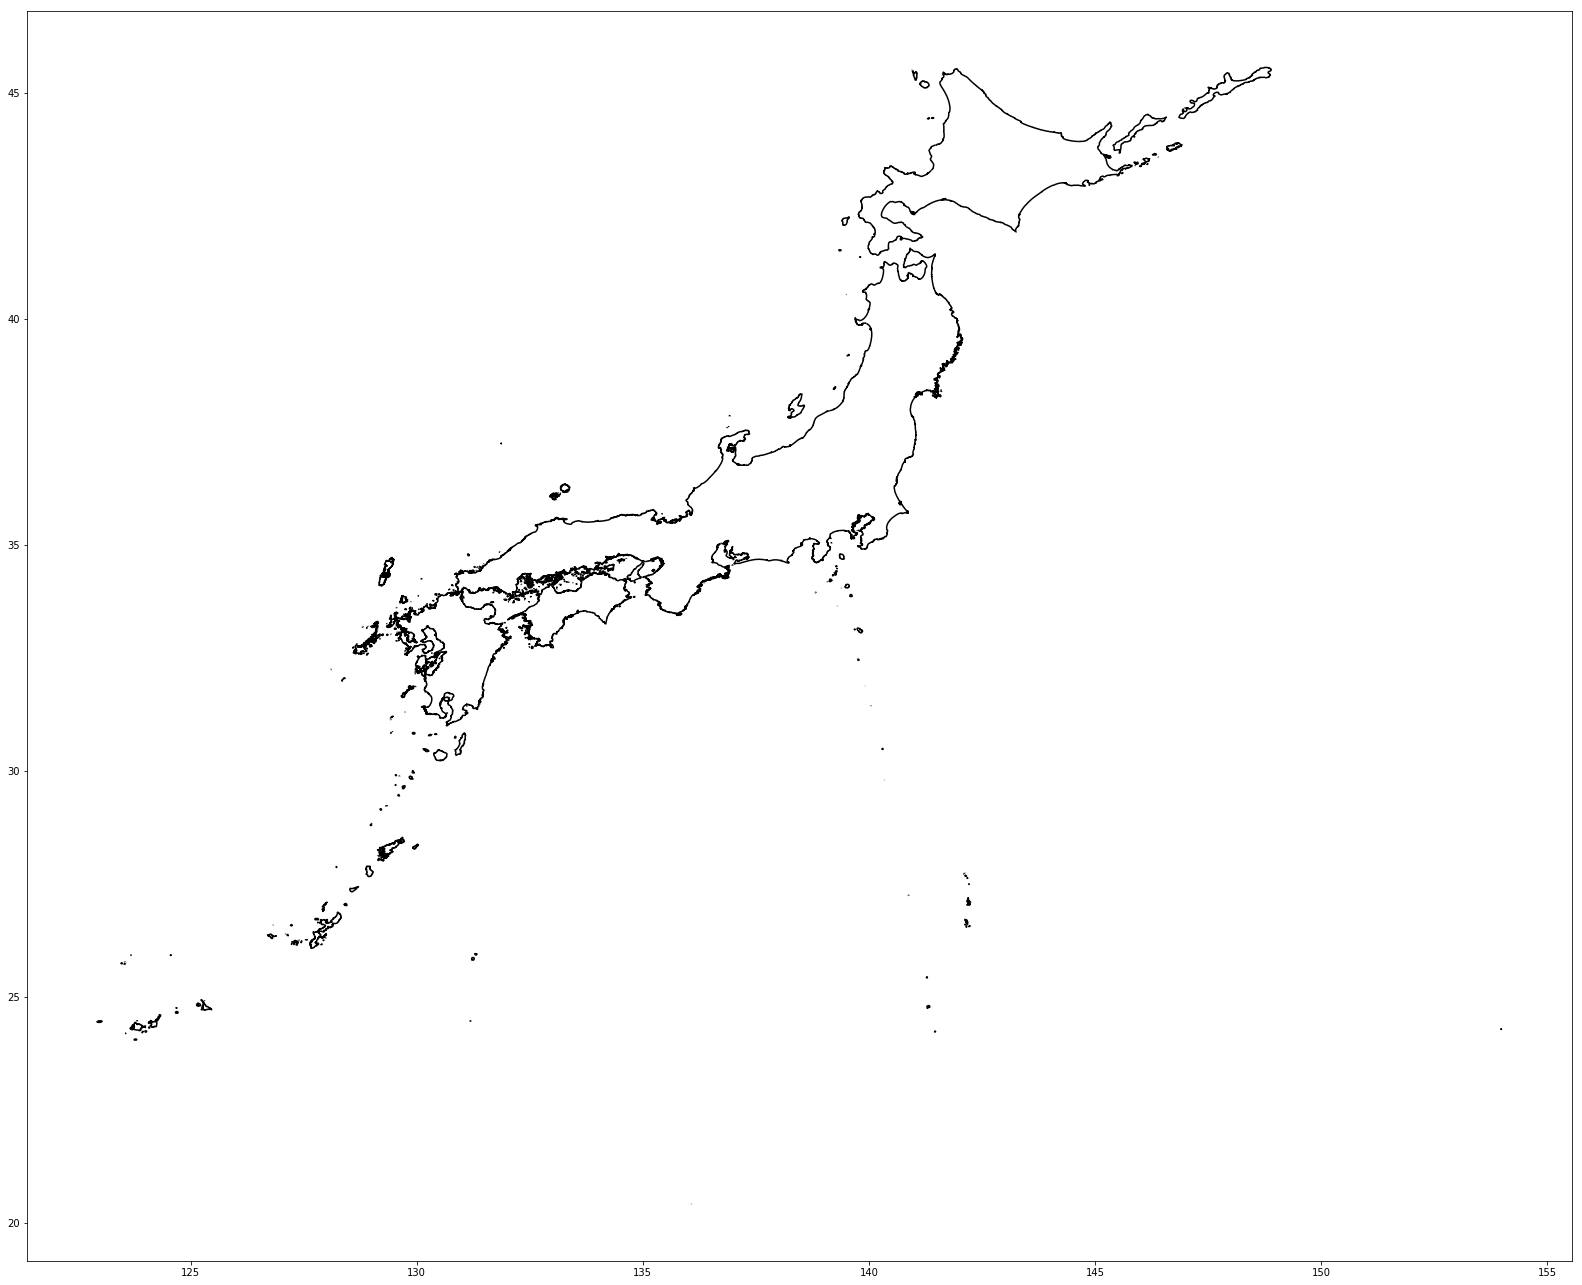

In [85]:
counties["geometry"].plot(color = "black", figsize = (30,23))

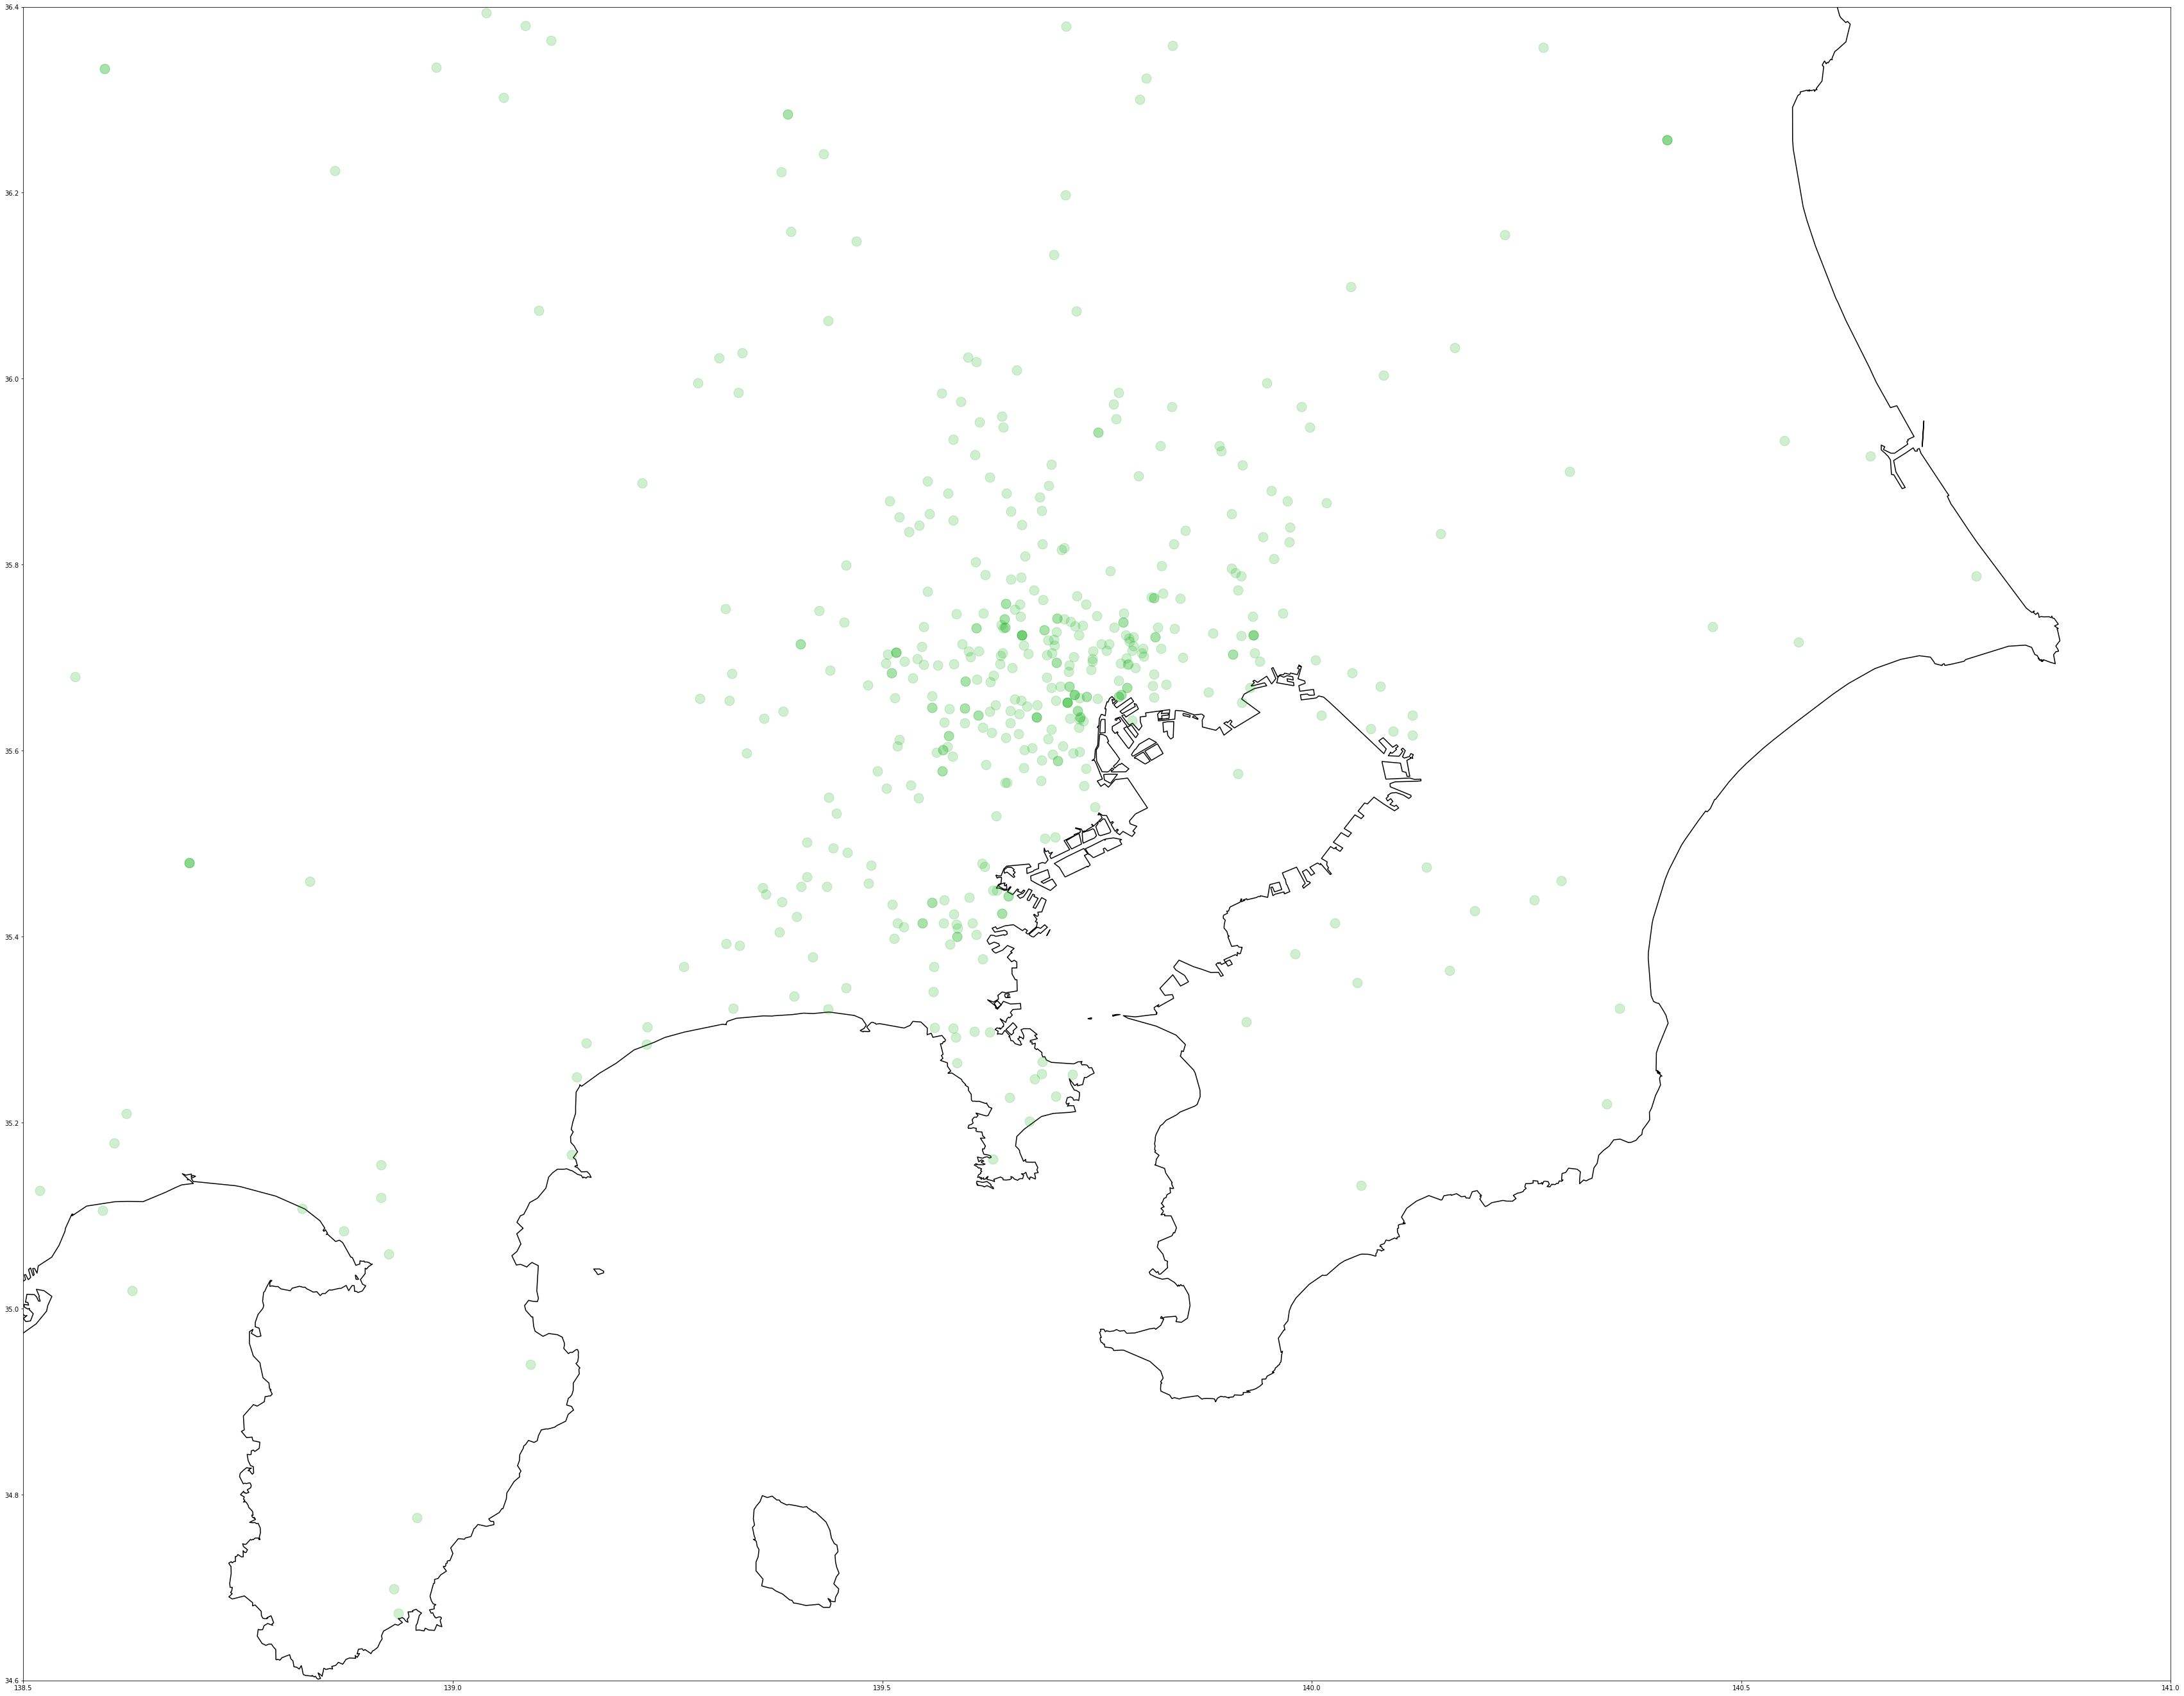

In [86]:
fig,ax = plt.subplots(figsize = (20*3,16*3))
plot(positive_customer["Longitude"],positive_customer["Latitude"], ".", ms = 30, alpha = 0.2 , color = "xkcd:green")
counties.plot(ax = ax, color = "black")
matplotlib.pyplot.xlim(138.5,141);
matplotlib.pyplot.ylim(34.6,36.4);


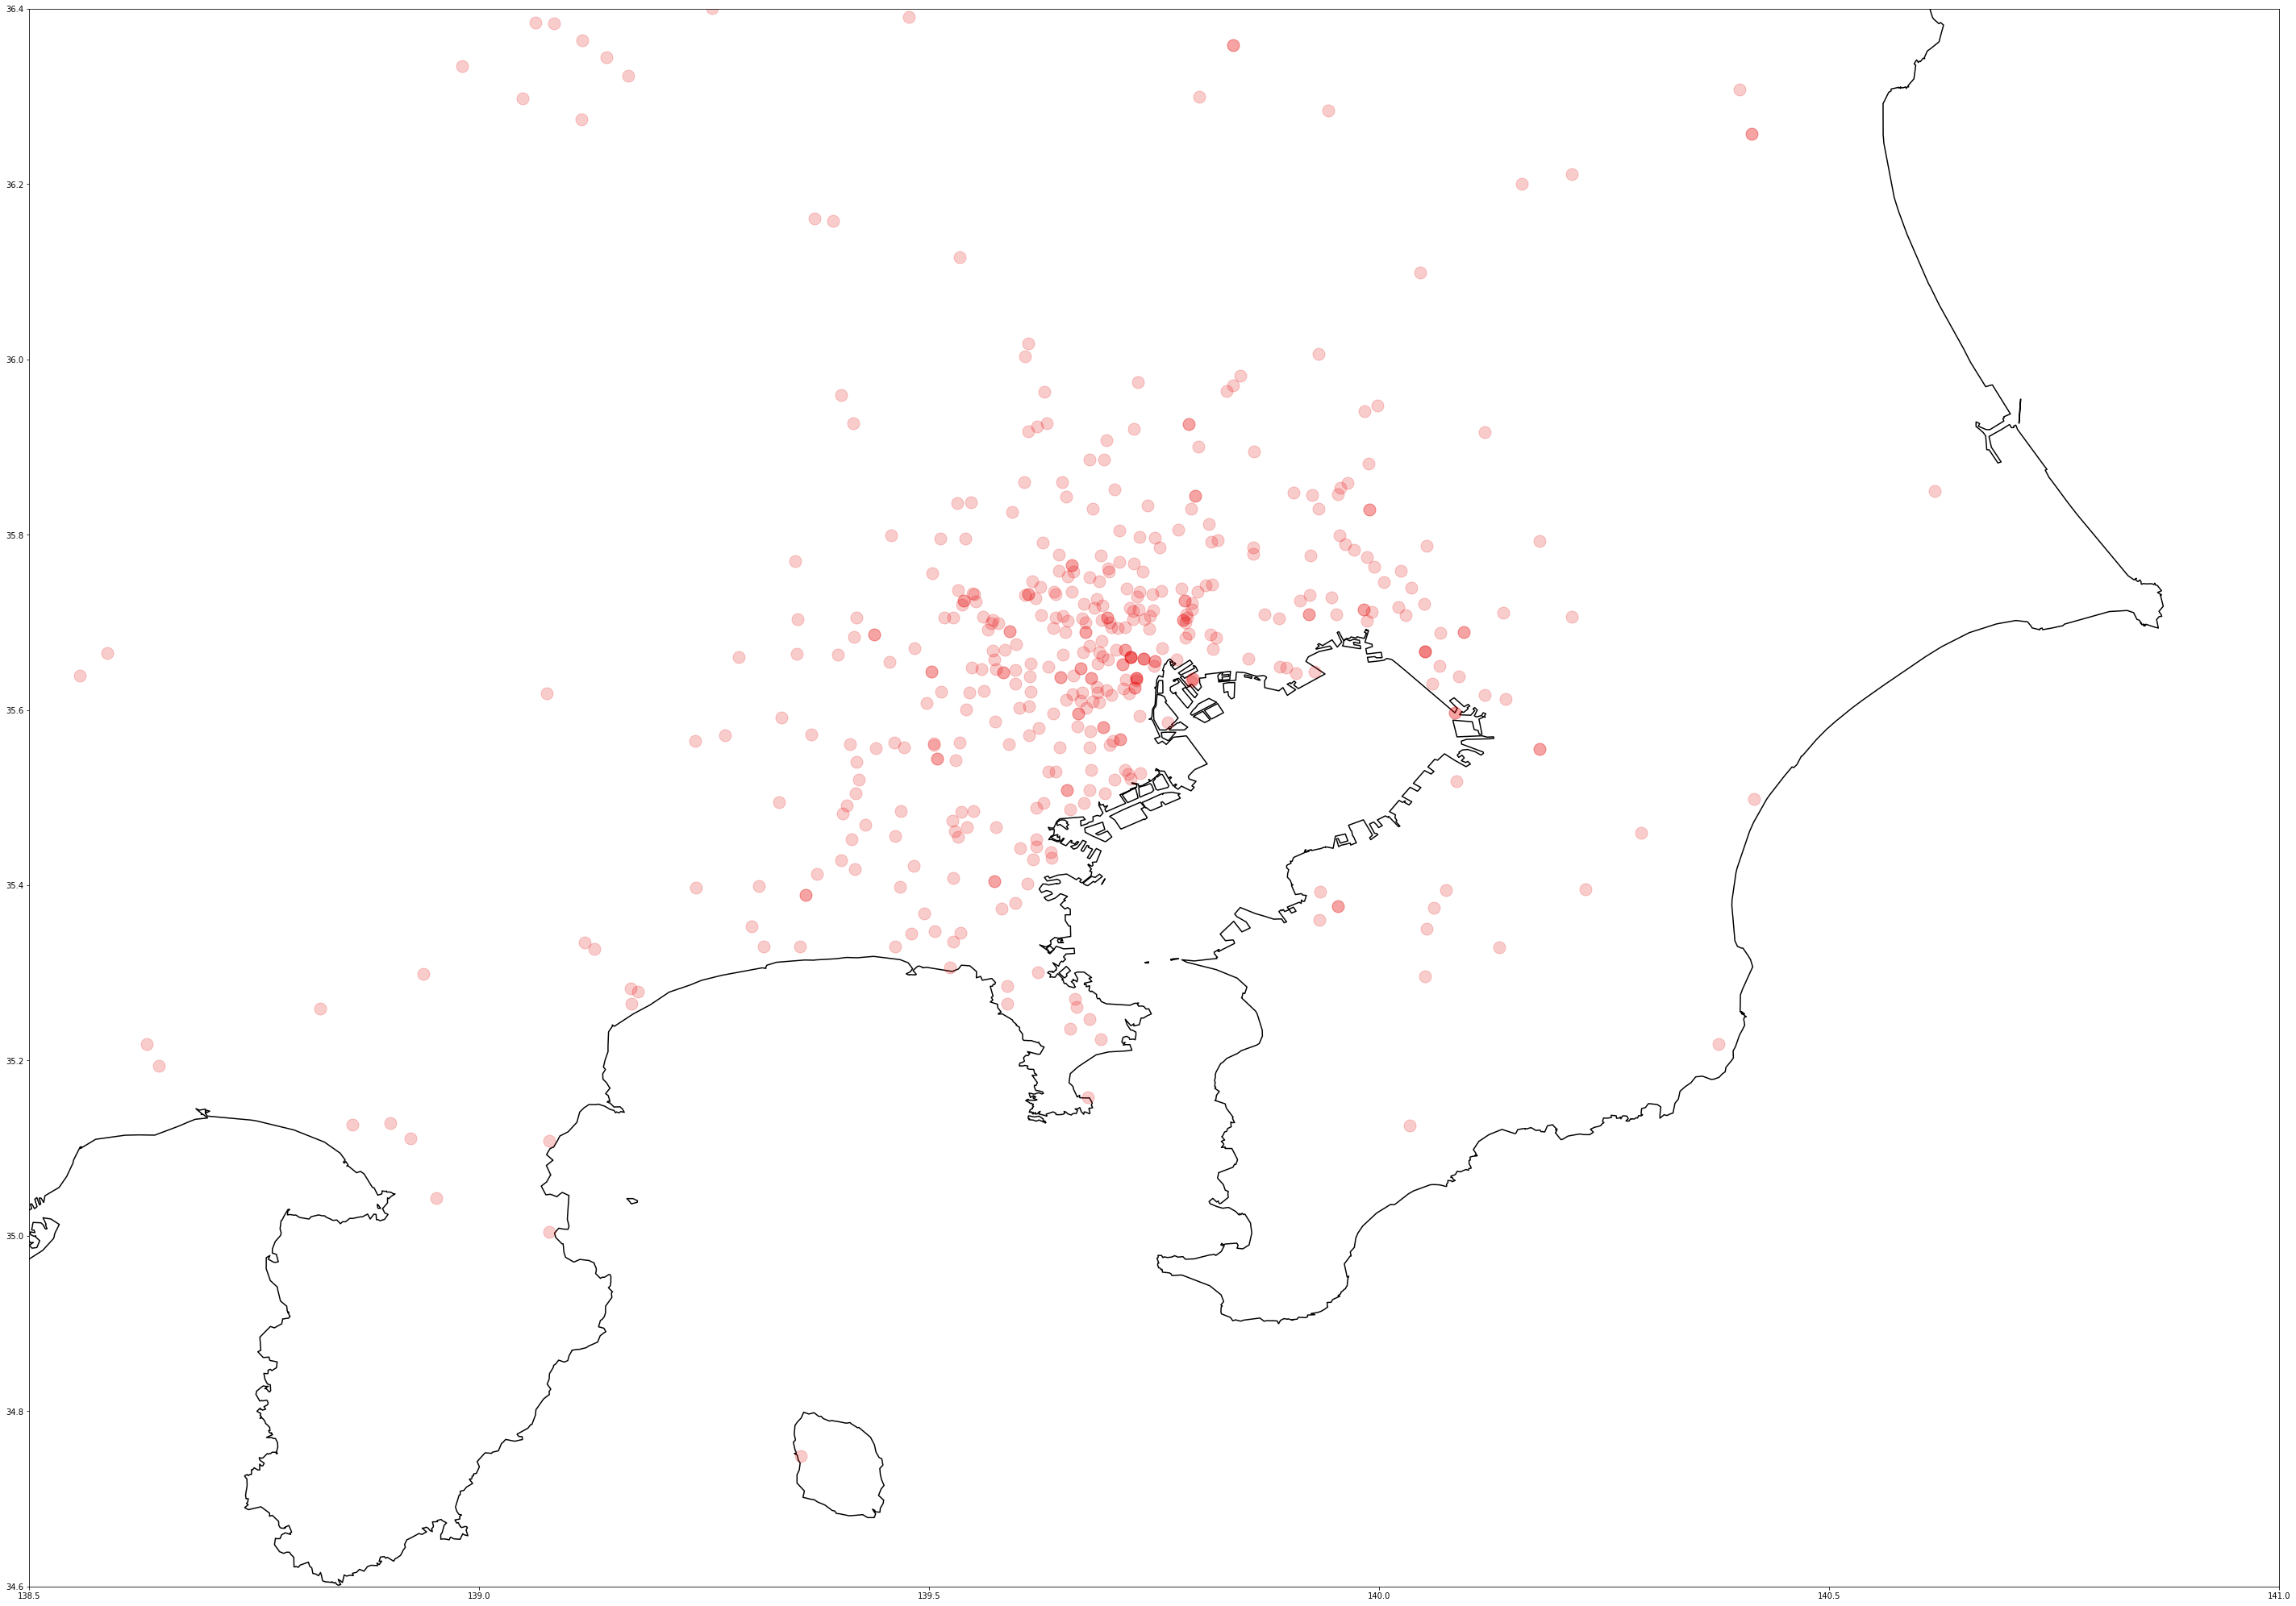

In [87]:
fig,ax = plt.subplots(figsize = (2.5*20,1.8*20))
plot(negative_customer["Longitude"],negative_customer["Latitude"], ".", ms = 30, alpha = 0.2 , color = "xkcd:red")
counties.plot(ax = ax, color = "black")
matplotlib.pyplot.xlim(138.5,141);
matplotlib.pyplot.ylim(34.6,36.4);

In [88]:
positive_customer

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude,Birthday_Year,Age_in_Years,Age_group
263,18199,621-0261,62,1,1940-11-17,10,134350,1,60000000288,1,1,Hatanocho Sengahata,Kyoto Fu,Kameoka Shi,34.9637,135.5421,40.0,77.451918,seventies
715,11201,354-0041,35,1,1941-03-14,4,69022,2,50000000039,2,3,Fujikubo,Saitama Ken,Iruma Gun,35.8357,139.5312,41.0,77.131370,seventies
710,3461,889-0616,88,1,1941-06-30,9,69218,1,60000000501,1,1,Minamimachi,Miyazaki Ken,Higashiusuki Gun,32.4833,131.5833,41.0,76.835479,seventies
554,18459,870-0251,87,1,1941-08-27,12,82324,1,60000000133,1,3,Ozaichuo,Oita Ken,Oita Shi,33.2453,131.7199,41.0,76.676575,seventies
1,10275,089-0352,8,1,1942-11-13,31,623707,1,60000000299,1,3,Mikagenishi2-Jo,Hokkaido,Kamikawa Gun,43.4444,142.8018,42.0,75.462877,seventies
711,9544,143-0011,14,1,1942-12-21,17,69147,1,60000000115,1,1,Omorihoncho,Tokyo To,Ota Ku,35.5807,139.7372,42.0,75.358767,seventies
479,12412,272-0014,27,2,1942-11-04,15,91045,1,60000000115,1,1,Tajiri,Chiba Ken,Ichikawa Shi,35.7048,139.9332,42.0,75.487534,seventies
468,21405,458-0846,45,2,1943-02-13,15,91670,2,50000000041,1,1,Narumicho (Yakushiyama),Aichi Ken,Nagoya Shi,35.0583,136.9667,43.0,75.210822,seventies
93,14162,639-2101,63,2,1944-06-09,13,216086,1,60000000010,2,1,Hikida,Nara Ken,Katsuragi Shi,34.5053,135.7238,44.0,73.890274,seventies
455,10354,520-2352,52,2,1945-01-03,12,93764,1,60000000317,1,1,Tobaotsu,Shiga Ken,Yasu Shi,35.2500,135.9667,45.0,73.320411,seventies


Numbers above shows the ration between positive and negegative within each age groups. 
The average number is average of all ratios. Shows male customers are positive to RC product than female customer (difference between pos and neg in each age groupd)

In [89]:
pos_cluster = positive_customer.groupby(by = ["Prefectures","Gender","Age_group"]).mean()
pos_cluster = pos_cluster.drop(["id","First_Two","Petbleed","Petsex","Email Reception\nPermission",
                               'Latitude','Longitude','Birthday_Year'], axis = 1)
pos_cluster_organized = pos_cluster.sort_values(['Purchase \nAmount','Number of \nPurchase'], ascending = False)

print(pos_cluster["Purchase \nAmount"].mean())
print(pos_cluster["Number of \nPurchase"].mean())
pos_cluster_organized

124982.17189722264
13.817465182430716


,,,Number of Purchase,Purchase Amount,Dog or Cat,Age_in_Years
Prefectures,Gender,Age_group,,,,
Hokkaido,1,seventies,31.000000,623707.000000,1.000,75.462877
Kagawa Ken,2,sixties,25.333333,404435.333333,1.000,61.213562
Chiba Ken,2,sixties,26.500000,375975.500000,1.000,66.008082
Ibaraki Ken,2,forties,21.000000,375234.000000,1.000,47.188904
Gifu Ken,1,sixties,27.000000,344492.000000,1.000,62.006712
Kyoto Fu,2,seventies,39.000000,270492.000000,1.000,70.188904
Hyogo Ken,2,sixties,30.000000,268545.000000,1.000,68.221781
Gifu Ken,2,thirties,20.000000,262138.000000,1.000,32.276575
Kagawa Ken,2,forties,17.500000,241412.000000,1.500,45.910822


In [90]:
neg_cluster = negative_customer.groupby(by = ["Gender","Prefectures"]).mean()
neg_cluster
neg_cluster = neg_cluster.drop(["id",'Unsubscribe','Petbleed',
                                'Petsex','Allow mail\n Reception','Latitude','Longitude',
                                'Registered_duration','Days_since_last_purchase','Birthday_Year'], axis = 1)
neg_cluster.sort_values(['Number of \nPurchase','Purchase \nAmount'], ascending = False)

Number of \nPurchase  Purchase \nAmount  \
Gender Prefectures                                              
1      Fukushima Ken                   1.0       13856.000000   
       Kumamoto Ken                    1.0       10973.000000   
2      Kochi Ken                       1.0        9408.000000   
1      Mie Ken                         1.0        9288.000000   
       Ishikawa Ken                    1.0        8716.000000   
       Shiga Ken                       1.0        8690.333333   
       Fukui Ken                       1.0        8622.000000   
2      Shizuoka Ken                    1.0        7484.428571   
1      Aomori Ken                      1.0        7418.000000   
2      Ehime Ken                       1.0        7250.200000   
       Okinawa Ken                     1.0        7179.000000   
1      Kagoshima Ken                   1.0        7150.000000   
2      Shimane Ken                     1.0        7046.500000   
1      Ehime Ken                       1.0        6636.333333   
2      Nara Ken                        1.0        6533.625000   
1      Osaka Fu                        1.0        6425.500000   
2      Miyagi Ken                      1.0        6381.000000   
       Kagawa Ken                      1.0        6300.000000   
       Akita Ken                       1.0        6081.333333   
1      Tochigi Ken                     1.0        5933.500000   
2      Nagano Ken                      1.0        5830.600000   
1      Shimane Ken                     1.0        5781.000000   
       Chiba Ken                       1.0        5773.600000   
2      Miyazaki Ken                    1.0        5515.000000   
1      Yamaguchi Ken                   1.0        5378.666667   
2      Tokushima Ken                   1.0        5349.333333   
       Ibaraki Ken                     1.0        5218.700000   
       Osaka Fu                        1.0        5213.062500   
       Hiroshima Ken                   1.0        5097.916667   
1      Hokkaido                        1.0        5042.000000   
...                                    ...                ...   
2      Oita Ken                        1.0        3681.600000   
1      Saitama Ken                     1.0        3670.846154   
       Ibaraki Ken                     1.0        3669.250000   
2      Mie Ken                         1.0        3657.250000   
       Chiba Ken                       1.0        3648.765957   
       Kumamoto Ken                    1.0        3594.142857   
       Niigata Ken                     1.0        3590.500000   
       Shiga Ken                       1.0        3556.857143   
       Hyogo Ken                       1.0        3548.259259   
1      Shizuoka Ken                    1.0        3474.750000   
       Yamanashi Ken                   1.0        3388.000000   
2      Okayama Ken                     1.0        3329.750000   
1      Oita Ken                        1.0        3218.500000   
2      Yamaguchi Ken                   1.0        3216.666667   
       Aichi Ken                       1.0        3201.476190   
       Nagasaki Ken                    1.0        3163.181818   
       Saga Ken                        1.0        3089.333333   
       Toyama Ken                      1.0        2711.000000   
1      Niigata Ken                     1.0        2477.250000   
       Hiroshima Ken                   1.0        2269.750000   
       Miyagi Ken                      1.0        2148.250000   
       Tokushima Ken                   1.0        2043.000000   
2      Ishikawa Ken                    1.0        1984.500000   
1      Gifu Ken                        1.0        1974.500000   
2      Aomori Ken                      1.0        1902.000000   
1      Nara Ken                        1.0        1821.250000   
       Yamagata Ken                    1.0        1472.500000   
       Kyoto Fu                        1.0         988.500000   
       Toyama Ken                      1.0         932.00

In [91]:
list(negative_customer)

['id',
 'Postal Code',
 'Gender',
 'Date of Birth',
 'First Purchase',
 'Number of \nPurchase',
 'Purchase \nAmount',
 'Member\nRegistration Date',
 'Member \nInformation Update',
 'Unsubscribe',
 'Email Reception\nPermission',
 'Dog or Cat',
 'Petbleed',
 'Petsex',
 'Allow mail\n Reception',
 'Place Name',
 'Prefectures',
 'Districts',
 'Latitude',
 'Longitude',
 'Registered_duration',
 'Days_since_last_purchase',
 'Birthday_Year',
 'Age_in_Years',
 'Age_group']

In [355]:
merged_negative["First Purchase"] = pd.to_datetime(merged_negative["First Purchase"])
merged_negative["Member\nRegistration Date"] = pd.to_datetime(merged_negative["Member\nRegistration Date"])

id                             5022
Postal Code                    4118
Gender                            2
Date of Birth                  1968
First Purchase                 5006
Number of \nPurchase              1
Purchase \nAmount              1424
Member\nRegistration Date      4982
Member \nInformation Update    1174
Unsubscribe                       2
Email Reception\nPermission       2
Dog or Cat                        2
Petbleed                        133
Petsex                            3
Allow mail\n Reception            2
Place Name                     3779
Prefectures                      47
Districts                       838
Latitude                       3154
Longitude                      3225
dtype: int64

In [102]:
merged_total_data.nunique()

id                             9167
Postal Code                    6618
First_Two                       100
Gender                            2
Date of Birth                  3442
Number of \nPurchase             44
Purchase \nAmount              4988
Dog or Cat                        2
Petbleed                        145
Petsex                            3
Email Reception\nPermission       2
Place Name                     5875
Prefectures                      47
Districts                       962
Latitude                       4628
Longitude                      4768
dtype: int64

In [114]:
Tokyo_detail = merged_total_data[merged_total_data["Prefectures"]=="Tokyo To"]
Tokyo_detail["Districts"].value_counts()

Setagaya Ku                  238
Minato Ku                    209
Ota Ku                       142
Nerima Ku                    124
Shibuya Ku                   113
Suginami Ku                  107
Shinjuku Ku                  105
Edogawa Ku                    92
Chuo Ku                       86
Meguro Ku                     85
Shinagawa Ku                  84
Adachi Ku                     81
Itabashi Ku                   78
Toshima Ku                    73
Taito Ku                      71
Koto Ku                       71
Hachioji Shi                  70
Sumida Ku                     64
Bunkyo Ku                     63
Machida Shi                   59
Nakano Ku                     58
Chofu Shi                     49
Kita Ku                       45
Chiyoda Ku                    42
Mitaka Shi                    40
Fuchu Shi                     31
Nishitokyo Shi                30
Katsushika Ku                 30
Musashino Shi                 30
Kodaira Shi                   23
Arakawa Ku

In [28]:
data_subset = data_subset[data_subset["Number of \nPurchase"] != 0 ]

In [29]:
data_subset = data_subset.sort_values(by = "Number of \nPurchase",
                                      ascending = False)

In [30]:
first_two_digit_list = list()
for item in data_subset["Postal Code"]:
    first_two_digit = item[:2]
    first_two_digit = int(first_two_digit)
    first_two_digit_list.append(first_two_digit)
len(first_two_digit_list)

11823

In [31]:
list(data_subset)

['id',
 'Postal Code',
 'Gender',
 'Date of Birth',
 'Number of \nPurchase',
 'Purchase \nAmount',
 'Dog or Cat',
 'Petbleed',
 'Petsex',
 'Email Reception\nPermission']

In [32]:
data_subset["First_Two"] = first_two_digit_list

In [33]:
data_subset["First_Two"] = first_two_digit_list
data_subset = data_subset.sort_values(by = "First_Two",
                                      ascending = True)
data_subset = data_subset[['id','Postal Code','First_Two','Gender','Date of Birth','Number of \nPurchase',
                           'Purchase \nAmount','Dog or Cat','Petbleed','Petsex','Email Reception\nPermission']]
data_subset.head()

,id,Postal Code,First_Two,Gender,Date of Birth,Number of Purchase,Purchase Amount,Dog or Cat,Petbleed,Petsex,Email Reception Permission
48749,9495,001-0027,0,2,4/19/82,1,6414,1,60000000506,2,3
17477,32040,004-0842,0,2,NaN,1,5776,1,60000000115,2,1
17478,32040,004-0842,0,2,NaN,1,5776,1,60000000115,2,1
18692,21473,007-0829,0,2,4/3/79,1,12928,2,50000000041,1,3
48445,10619,003-0028,0,2,3/23/59,2,7974,2,59900000001,2,1


number of pets (Dog = 1, Cat = 2)

In [14]:
Dog = (data_subset["Dog or Cat"] == 1).sum()
Cat = (data_subset["Dog or Cat"] == 2).sum()
print("Number of Dog: ", Dog)
print("Number of Cat: ", Cat)
print("Total: ", Dog+Cat)

Number of Dog:  5677
Number of Cat:  6146
Total:  11823


In [15]:
data_subset.nunique()

id                             9203
Postal Code                    6654
First_Two                       100
Gender                            2
Date of Birth                  3451
Number of \nPurchase             44
Purchase \nAmount              5000
Dog or Cat                        2
Petbleed                        146
Petsex                            3
Email Reception\nPermission       2
dtype: int64

In [37]:
merged_total_data = pd.merge(data_subset,location_data, on ="Postal Code", how = "inner")

In [38]:
len(merged_total_data)

11991

In [45]:
merged_total_data.nunique()

id                             9167
Postal Code                    6618
First_Two                       100
Gender                            2
Date of Birth                  3442
Number of \nPurchase             44
Purchase \nAmount              4988
Dog or Cat                        2
Petbleed                        145
Petsex                            3
Email Reception\nPermission       2
Place Name                     5875
Prefectures                      47
Districts                       962
Latitude                       4628
Longitude                      4768
dtype: int64

In [21]:
merged_total_data.to_excel("July4thMerged.xlsx")

In [41]:
(merged_total_data["Longitude"].isnull()).sum()

0

### ========= CRM MAIL RECEPTION ANALYSIS =========

## Acquiring files needed
#### CRM_Customer (modified version) 


In [94]:
import seaborn
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
CRM_data = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/CRM Mail Reception Analysis (Slide 4,5)/CRM_modified.xlsx")
cleaned_df = CRM_data

In [95]:
CRM_data

,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception
0,267,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
1,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
2,269,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0
3,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
4,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
5,272,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-05-15 19:50:00,0,3.0
6,273,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-05-15 19:50:00,0,3.0
7,274,NaN,NaN,2,1968-02-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
8,275,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
9,276,NaN,NaN,1,1978-11-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0


In [96]:
CRM_data.nunique()

Registration Number               494416
Zip First Half                      1564
Zip Second Half                     5042
Gender                                 4
Birthday                           13835
First purchase date                    0
Last purchase date                     0
Number of purchases                    0
Purchase price                         1
Member registration date           16871
Member information update date     13610
Withdrawal                             3
Allow mail news reception              3
dtype: int64

In [97]:
print("First Zip available",(CRM_data["Zip First Half"].notnull()).sum())
print("Second Zip available",(CRM_data["Zip Second Half"].notnull()).sum())

First Zip available 455744
Second Zip available 455743


In [98]:
cleaned_df = CRM_data.dropna(subset = ["Zip First Half","Zip Second Half","Gender"])
cleaned_df 

,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception
20,287,212,2,2,1972-05-02 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
132,399,485,825,2,1985-09-15 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
344,611,223,62,1,1976-03-02 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
467,734,701,1211,2,1983-01-05 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
647,914,270,2261,2,1974-07-29 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
815,1082,30,945,2,1971-08-06 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
922,1189,709,631,2,1971-09-21 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
930,1197,670,64,2,1982-05-22 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0
980,1247,519,143,2,1950-03-25 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-08-04 12:23:00,0,3.0
1469,1736,370,1201,2,1991-10-30 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0


In [99]:
list(cleaned_df)

['Registration Number',
 'Zip First Half',
 'Zip Second Half',
 'Gender',
 'Birthday',
 'First purchase date',
 'Last purchase date',
 'Number of purchases',
 'Purchase price',
 'Member registration date',
 'Member information update date',
 'Withdrawal',
 'Allow mail news reception']

### Formatting Data Frame Needed

In [101]:
first_half = cleaned_df["Zip First Half"] 
first_half = first_half.to_frame()
first_half = first_half.convert_objects(convert_numeric = True).dropna()

second_half = cleaned_df["Zip Second Half"] 
second_half = second_half.to_frame()
second_half = second_half.convert_objects(convert_numeric = True).dropna()

gender_data = cleaned_df["Gender"] 
gender_data = gender_data.to_frame()
gender_data = gender_data.convert_objects(convert_numeric = True).dropna()

subscription_data =  cleaned_df["Allow mail news reception"]
subscription_data = subscription_data.to_frame()

id_number_data = cleaned_df["Registration Number"]
id_number_data = id_number_data.to_frame()

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  import sys
/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_d

In [102]:
first_merge = pd.merge(first_half,second_half,how="inner",right_index=True,left_index=True)
second_merge = pd.merge(first_merge,gender_data,how="inner",right_index=True,left_index=True)
third_merge = pd.merge(second_merge,subscription_data,how="inner",right_index=True,left_index=True)
fourth_merge = pd.merge(third_merge,id_number_data,how="inner",right_index=True,left_index=True)

fourth_merge["Zip First Half"] = fourth_merge["Zip First Half"].astype(int);
fourth_merge["Zip First Half"] = fourth_merge["Zip First Half"].astype(str);
fourth_merge["Zip Second Half"] = fourth_merge["Zip Second Half"].astype(int);
fourth_merge["Zip Second Half"] = fourth_merge["Zip Second Half"].astype(str);
fourth_merge["Zip First Half"] = fourth_merge["Zip First Half"].str.zfill(3);
fourth_merge["Zip Second Half"] = fourth_merge["Zip Second Half"].str.zfill(4);

full_zip_list = list()
for index, row in fourth_merge.iterrows():
    full_zip = row["Zip First Half"]+"-"+ row["Zip Second Half"] 
    full_zip_list.append(full_zip)
fourth_merge["Postal Code"] = full_zip_list

fourth_merge = fourth_merge[['Registration Number','Postal Code',"Zip First Half",'Gender','Allow mail news reception']]
fourth_merge

,Registration Number,Postal Code,Zip First Half,Gender,Allow mail news reception
20,287,212-0002,212,2.0,1.0
132,399,485-0825,485,2.0,1.0
344,611,223-0062,223,1.0,1.0
467,734,701-1211,701,2.0,1.0
647,914,270-2261,270,2.0,1.0
815,1082,030-0945,030,2.0,1.0
922,1189,709-0631,709,2.0,1.0
930,1197,670-0064,670,2.0,1.0
980,1247,519-0143,519,2.0,3.0
1469,1736,370-1201,370,2.0,1.0


In [103]:
location_data = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/CRM Mail Reception Analysis (Slide 4,5)/July4th_Location.xlsx")
merged_total_data = pd.merge(fourth_merge,location_data, on ="Postal Code", how = "inner")
merged_total_data = merged_total_data.drop_duplicates(subset="Registration Number", keep = "first")
merged_total_data

,Registration Number,Postal Code,Zip First Half,Gender,Allow mail news reception,Place Name,Prefectures,Districts,Latitude,Longitude
0,287,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
1,199933,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
2,144886,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
3,304891,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
4,315020,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
5,346310,212-0002,212,0.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
6,387139,212-0002,212,1.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
7,423286,212-0002,212,2.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
8,459300,212-0002,212,1.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966
9,467659,212-0002,212,1.0,1.0,Komukai Nakanocho,Kanagawa Ken,Kawasaki Shi,35.5506,139.6966


###### Total Data Points: 428156

##### List of Interested Prefectures : Saitama Ken, Tokyo To, Aichi Ken, Nagano Ken, Hokkaido, Chiba Ken, Fukuoka Ken, Niigata Ken

In [104]:
base = merged_total_data["Allow mail news reception"].value_counts()
print("Total number of data: ", base.sum())
print("Total number of customer allowed mail reception: ", base[1])
overall_rate = base[1]/base.sum()
print("Overall mail reception Ratio: ",overall_rate)

Total number of data:  428156
Total number of customer allowed mail reception:  390502
Overall mail reception Ratio:  0.9120554190528686


##### Allow mail news reception (1: Accept , 3: Deny) 


In [105]:
prefecture_list = ["Saitama Ken","Tokyo To","Aichi Ken","Nagano Ken","Hokkaido","Chiba Ken","Fukuoka Ken","Niigata Ken"]

i = 0
while i < len(prefecture_list):
    test_data = merged_total_data[merged_total_data["Prefectures"] == prefecture_list[i]]
    print("***",prefecture_list[i],"***");
    print("Total number of customer in",prefecture_list[i],": ",test_data["Allow mail news reception"].value_counts().sum())
    print("Customer allowing reception",prefecture_list[i],": ",test_data["Allow mail news reception"].value_counts()[1])
    reception_rate = (test_data["Allow mail news reception"].value_counts()[1]/test_data["Allow mail news reception"].value_counts().sum()).round(3)
    print("Reception Ratio: ",reception_rate)
    if reception_rate > overall_rate:
        print("=RESULT= : POSITIVE")
    else:
        print("=RESULT= : NEGATIVE")
    print(" ")
    i += 1

*** Saitama Ken ***
Total number of customer in Saitama Ken :  27671
Customer allowing reception Saitama Ken :  25273
Reception Ratio:  0.913
=RESULT= : POSITIVE
 
*** Tokyo To ***
Total number of customer in Tokyo To :  48068
Customer allowing reception Tokyo To :  43290
Reception Ratio:  0.901
=RESULT= : NEGATIVE
 
*** Aichi Ken ***
Total number of customer in Aichi Ken :  32348
Customer allowing reception Aichi Ken :  29695
Reception Ratio:  0.918
=RESULT= : POSITIVE
 
*** Nagano Ken ***
Total number of customer in Nagano Ken :  7602
Customer allowing reception Nagano Ken :  7080
Reception Ratio:  0.931
=RESULT= : POSITIVE
 
*** Hokkaido ***
Total number of customer in Hokkaido :  31454
Customer allowing reception Hokkaido :  28132
Reception Ratio:  0.894
=RESULT= : NEGATIVE
 
*** Chiba Ken ***
Total number of customer in Chiba Ken :  21319
Customer allowing reception Chiba Ken :  19439
Reception Ratio:  0.912
=RESULT= : NEGATIVE
 
*** Fukuoka Ken ***
Total number of customer in Fuk

#### MAIL RECEPTION RATIO ANALYSIS ON GENDER & AGE
Checking the number of data available

In [106]:
print("Customer Birthday available:",(CRM_data["Birthday"].notnull()).sum())

Customer Birthday available: 46742


In [107]:
cleaned_df_age_gender = CRM_data.dropna(subset = ["Birthday","Gender"])
cleaned_df_age_gender = cleaned_df_age_gender[['Registration Number','Gender','Birthday','Allow mail news reception']]  
cleaned_df_age_gender 

,Registration Number,Gender,Birthday,Allow mail news reception
0,267,1,1990-01-01 00:00:00,1.0
1,268,1,1990-01-01 00:00:00,1.0
2,269,1,1990-01-01 00:00:00,3.0
3,270,1,1990-01-01 00:00:00,1.0
4,271,1,1990-01-01 00:00:00,1.0
5,272,1,1990-01-01 00:00:00,3.0
6,273,1,1990-01-01 00:00:00,3.0
7,274,2,1968-02-16 00:00:00,1.0
8,275,1,1990-01-01 00:00:00,1.0
9,276,1,1978-11-16 00:00:00,3.0


In [108]:
# refer_time: latest date found in data set
refer_time = pd.to_datetime('2018-04-11 22:48:00')

#Adding age column
age_in_year = list()
diff_in_days = (refer_time - cleaned_df_age_gender["Birthday"])
Age_in_year = (diff_in_days /pd.Timedelta(days=365))
cleaned_df_age_gender["Age_in_Years"] = Age_in_year

#Adding age group column
age_group = list()
for item in cleaned_df_age_gender["Age_in_Years"]:
    if pd.isna(item) == True:
        age_group.append(item)
    elif item < 20:
        age_group.append("teens")
    elif 20 < item < 30:
        age_group.append("twenties")
    elif 30 < item < 40:
        age_group.append("thirties")
    elif 40 < item < 50:
        age_group.append("forties")
    elif 50 < item < 60:
        age_group.append("fifties")
    elif 60 < item < 70:
        age_group.append("sixties")
    elif 70 < item < 80:
        age_group.append("seventies")
    elif 80 < item < 90:
        age_group.append("eighties")
    elif 90 < item < 100:
        age_group.append("nineties")
cleaned_df_age_gender["Age_group"] = age_group
cleaned_df_age_gender

,Registration Number,Gender,Birthday,Allow mail news reception,Age_in_Years,Age_group
0,267,1,1990-01-01 00:00:00,1.0,28.295753,twenties
1,268,1,1990-01-01 00:00:00,1.0,28.295753,twenties
2,269,1,1990-01-01 00:00:00,3.0,28.295753,twenties
3,270,1,1990-01-01 00:00:00,1.0,28.295753,twenties
4,271,1,1990-01-01 00:00:00,1.0,28.295753,twenties
5,272,1,1990-01-01 00:00:00,3.0,28.295753,twenties
6,273,1,1990-01-01 00:00:00,3.0,28.295753,twenties
7,274,2,1968-02-16 00:00:00,1.0,50.186164,fifties
8,275,1,1990-01-01 00:00:00,1.0,28.295753,twenties
9,276,1,1978-11-16 00:00:00,3.0,39.430000,thirties


#### Checking average mail reception ration of total birthday data

In [109]:
base = cleaned_df_age_gender["Allow mail news reception"].value_counts()
print("Total number of data: ", base.sum())
print("Total number of customer allowed mail reception: ", base[1])
overall_rate_age_gender = (base[1]/base.sum()).round(3)
print("Overall mail reception Ratio: ",overall_rate_age_gender)

Total number of data:  46741
Total number of customer allowed mail reception:  39573
Overall mail reception Ratio:  0.847


In [110]:
age_gender_male = cleaned_df_age_gender[cleaned_df_age_gender["Gender"] == 1]
age_gender_female = cleaned_df_age_gender[cleaned_df_age_gender["Gender"] == 2]
print(age_gender_male["Age_group"].value_counts())

print(age_gender_female["Age_group"].value_counts())

forties      3925
fifties      3648
thirties     3099
sixties      2040
twenties     1328
seventies     537
teens          88
eighties       62
Name: Age_group, dtype: int64
forties      10624
thirties      7861
fifties       6501
twenties      5057
sixties       1504
teens          236
seventies      194
eighties        37
Name: Age_group, dtype: int64


### Getting Result

Interested group:
*Female, 20s 
*Female, 30s
*Female, 40s
*Female, 50s
*Male, 30s
*Male, 50s
*Male, 60s
*Female, 70s

In [111]:
i = 0
age_group_list = ["twenties","thirties","forties","fifties","sixties","seventies"]
age_group_list_num = ["20's","30's","40's","50's","60's","70's"]

print("Overall mail reception Ratio: ",overall_rate_age_gender)
print(" ")
while i < len(age_group_list):
    base = age_gender_male[age_gender_male["Age_group"] == age_group_list[i]]["Allow mail news reception"].value_counts()
    total_number = base.sum()
    allowed_mail = base[1]
    ratio = (allowed_mail/total_number).round(3)
    
    print("Total Number of Customer in Male",age_group_list_num[i],": ",total_number)
    print("Customer Allowing mail reception: ", allowed_mail)
    print("Reception Ratio: ",ratio)
    if ratio > overall_rate_age_gender:
        print("=RESULT= : POSITIVE")
    else:
        print("=RESULT= : NEGATIVE")
    print(" ")
    i += 1

Overall mail reception Ratio:  0.847
 
Total Number of Customer in Male 20's :  1328
Customer Allowing mail reception:  1086
Reception Ratio:  0.818
=RESULT= : NEGATIVE
 
Total Number of Customer in Male 30's :  3099
Customer Allowing mail reception:  2726
Reception Ratio:  0.88
=RESULT= : POSITIVE
 
Total Number of Customer in Male 40's :  3925
Customer Allowing mail reception:  3346
Reception Ratio:  0.852
=RESULT= : POSITIVE
 
Total Number of Customer in Male 50's :  3648
Customer Allowing mail reception:  3066
Reception Ratio:  0.84
=RESULT= : NEGATIVE
 
Total Number of Customer in Male 60's :  2040
Customer Allowing mail reception:  1675
Reception Ratio:  0.821
=RESULT= : NEGATIVE
 
Total Number of Customer in Male 70's :  537
Customer Allowing mail reception:  451
Reception Ratio:  0.84
=RESULT= : NEGATIVE
 


In [112]:
i = 0
age_group_list = ["twenties","thirties","forties","fifties","sixties","seventies"]
age_group_list_num = ["20's","30's","40's","50's","60's","70's"]

print("Overall mail reception Ratio: ",overall_rate_age_gender)
print(" ")
while i < len(age_group_list):
    base = age_gender_female[age_gender_female["Age_group"] == age_group_list[i]]["Allow mail news reception"].value_counts()
    total_number = base.sum()
    allowed_mail = base[1]
    ratio = (allowed_mail/total_number).round(3)
    
    print("Total Number of Customer in Female",age_group_list_num[i],": ",total_number)
    print("Customer Allowing mail reception: ", allowed_mail)
    print("Reception Ratio: ",ratio)
    if ratio > overall_rate_age_gender:
        print("=RESULT= : POSITIVE")
    else:
        print("=RESULT= : NEGATIVE")
    print(" ")
    i += 1

Overall mail reception Ratio:  0.847
 
Total Number of Customer in Female 20's :  5057
Customer Allowing mail reception:  4182
Reception Ratio:  0.827
=RESULT= : NEGATIVE
 
Total Number of Customer in Female 30's :  7861
Customer Allowing mail reception:  6621
Reception Ratio:  0.842
=RESULT= : NEGATIVE
 
Total Number of Customer in Female 40's :  10624
Customer Allowing mail reception:  9079
Reception Ratio:  0.855
=RESULT= : POSITIVE
 
Total Number of Customer in Female 50's :  6501
Customer Allowing mail reception:  5568
Reception Ratio:  0.856
=RESULT= : POSITIVE
 
Total Number of Customer in Female 60's :  1504
Customer Allowing mail reception:  1269
Reception Ratio:  0.844
=RESULT= : NEGATIVE
 
Total Number of Customer in Female 70's :  194
Customer Allowing mail reception:  157
Reception Ratio:  0.809
=RESULT= : NEGATIVE
 


In [113]:
age_gender_female["Age_group"].value_counts()

forties      10624
thirties      7861
fifties       6501
twenties      5057
sixties       1504
teens          236
seventies      194
eighties        37
Name: Age_group, dtype: int64

## ===== PET BREED =====

## Acquiring files needed
#### CRM_Customer (modified version) and CRM_Pet (modified version)

In [114]:
import seaborn
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
CRM_customer = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/PET BREED (Slide 12)/CRM_modified.xlsx")
CRM_pet = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/PET BREED (Slide 12)/CRM_pet_Dan_version.xlsx")

In [115]:
CRM_pet

,CRM Pet ID,Registration Number,Dogs or Cats,Pet breed,Mail Reception Permission
0,3369,268,1.0,60000000148,1.0
1,3370,269,1.0,60000000130,1.0
2,3371,270,1.0,60000000072,1.0
3,3372,271,1.0,60000000270,1.0
4,3373,274,2.0,50000000001,1.0
5,3374,276,1.0,60000000133,1.0
6,3375,277,1.0,60000000084,1.0
7,3376,279,1.0,60000000306,1.0
8,3377,282,2.0,0,1.0
9,3378,283,1.0,60000000506,1.0


##### Cleaning pet data with unknown pet breed numbers

In [116]:
CRM_pet = CRM_pet[CRM_pet["Pet breed"] != 1000000000000000]
CRM_pet = CRM_pet[CRM_pet["Pet breed"] != 0]
CRM_pet.nunique()

CRM Pet ID                   443669
Registration Number          400309
Dogs or Cats                      3
Pet breed                       205
Mail Reception Permission         1
dtype: int64

##### Checking Registration number of customer matching with the Registration number of pet

In [117]:
(CRM_pet["Registration Number"].isin(CRM_customer["Registration Number"])).sum()

434130

In [118]:
(CRM_customer["Registration Number"].isin(CRM_pet["Registration Number"])).sum()

400307

##### Merging Customer dataset with Pet dataset using Registration Number (434130 data point)

In [119]:
merged_data = pd.merge(CRM_customer,CRM_pet, how = "inner", on ="Registration Number")
merged_data

,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3369,1.0,60000000148,1.0
1,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40943,1.0,60000000317,1.0
2,269,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3370,1.0,60000000130,1.0
3,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3371,1.0,60000000072,1.0
4,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40944,1.0,60000000072,1.0
5,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3372,1.0,60000000270,1.0
6,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40945,2.0,50000000001,1.0
7,274,NaN,NaN,2,1968-02-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3373,2.0,50000000001,1.0
8,276,NaN,NaN,1,1978-11-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3374,1.0,60000000133,1.0
9,277,NaN,NaN,1,1984-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-05-03 16:40:00,0,3.0,3375,1.0,60000000084,1.0


##### Checking top pet breed (1 - 20)

In [120]:
merged_data["Pet breed"].value_counts()[:21]

60000000506    64664
60000000320    45923
60000000133    33837
50000000041    31754
60000000130    20577
50000000004    18125
60000000499    15588
50000000031    15484
50000000032    10557
60000000115    10489
60000000324     9334
59900000001     7703
50000000010     7671
60000000053     7515
50000000038     7129
60000000314     7105
50000000029     6838
50000000039     6834
60000000310     5967
60000000490     5249
60000000299     5050
Name: Pet breed, dtype: int64

### First, Analyzing Location Data of the Positive and Negative Customer
###### Making data subset by dropping data without zip code information (404631 remaining)

In [121]:
merged_data_location = merged_data[merged_data["Zip First Half"].isnull() == False]
merged_data_location = merged_data_location[merged_data_location["Zip Second Half"].isnull() == False]

location = merged_data_location
location = location.reset_index()
location

,index,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,274,1082,30,945,2,1971-08-06 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41273,1.0,60000000133,1.0
1,305,1189,709,631,2,1971-09-21 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3635,2.0,50000000007,1.0
2,307,1197,670,64,2,1982-05-22 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40982,2.0,50000000029,1.0
3,325,1247,519,143,2,1950-03-25 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-08-04 12:23:00,0,3.0,3649,1.0,60000000506,1.0
4,451,1736,370,1201,2,1991-10-30 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3752,1.0,60000000133,1.0
5,528,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3836,1.0,60000000130,1.0
6,529,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41743,1.0,60000000130,1.0
7,530,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41744,1.0,60000000130,1.0
8,731,3514,659,24,2,1974-03-19 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4024,2.0,50000000041,1.0
9,1061,4830,606,24,1,1962-09-09 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4342,1.0,60000000115,1.0


In [122]:
merged_data_location = merged_data[merged_data["Zip First Half"].isnull() == False]
merged_data_location = merged_data_location[merged_data_location["Zip Second Half"].isnull() == False]

location = merged_data_location
location = location.reset_index()
location

,index,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,274,1082,30,945,2,1971-08-06 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41273,1.0,60000000133,1.0
1,305,1189,709,631,2,1971-09-21 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3635,2.0,50000000007,1.0
2,307,1197,670,64,2,1982-05-22 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40982,2.0,50000000029,1.0
3,325,1247,519,143,2,1950-03-25 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-08-04 12:23:00,0,3.0,3649,1.0,60000000506,1.0
4,451,1736,370,1201,2,1991-10-30 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3752,1.0,60000000133,1.0
5,528,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3836,1.0,60000000130,1.0
6,529,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41743,1.0,60000000130,1.0
7,530,2557,190,31,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41744,1.0,60000000130,1.0
8,731,3514,659,24,2,1974-03-19 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4024,2.0,50000000041,1.0
9,1061,4830,606,24,1,1962-09-09 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4342,1.0,60000000115,1.0


##### Refining Zip Code Information to Generate Format Needed

In [123]:
zip_1st = list()
zip_2nd = list()
for item in location["Zip First Half"]:
    item = str(item)
    zip_first_half = item[-3:]
    zip_first_half = int(zip_first_half)
    zip_1st.append(zip_first_half)
    
for item in location["Zip Second Half"]:
    item = str(item)
    zip_second_half = item[-3:]
    zip_second_half = int(zip_second_half)
    zip_2nd.append(zip_second_half)

In [124]:
location.drop(["Zip First Half","Zip Second Half"], axis = 1)
location["Zip First Half"] = zip_1st
location["Zip Second Half"] = zip_2nd

##### Summing All Zip Code to Verify their Integer Data Type 

In [125]:
print(location["Zip First Half"].sum())
print(location["Zip Second Half"].sum())

181095814
101546173


##### Generate Postal Code Column by Using Zip Code Information

In [126]:
location["Zip First Half"] = location["Zip First Half"].astype(int);
location["Zip First Half"] = location["Zip First Half"].astype(str);
location["Zip Second Half"] = location["Zip Second Half"].astype(int);
location["Zip Second Half"] = location["Zip Second Half"].astype(str);
location["Zip First Half"] = location["Zip First Half"].str.zfill(3);
location["Zip Second Half"] = location["Zip Second Half"].str.zfill(4);

In [127]:
full_zip_list = list()
for index, row in location.iterrows():
    full_zip = row["Zip First Half"]+"-"+ row["Zip Second Half"] 
    full_zip_list.append(full_zip)
full_zip_list[:5]

['030-0945', '709-0631', '670-0064', '519-0143', '370-0201']

In [128]:
location["Postal Code"] = full_zip_list
location

,index,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission,Postal Code
0,274,1082,030,0945,2,1971-08-06 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41273,1.0,60000000133,1.0,030-0945
1,305,1189,709,0631,2,1971-09-21 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3635,2.0,50000000007,1.0,709-0631
2,307,1197,670,0064,2,1982-05-22 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40982,2.0,50000000029,1.0,670-0064
3,325,1247,519,0143,2,1950-03-25 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-08-04 12:23:00,0,3.0,3649,1.0,60000000506,1.0,519-0143
4,451,1736,370,0201,2,1991-10-30 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3752,1.0,60000000133,1.0,370-0201
5,528,2557,190,0031,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3836,1.0,60000000130,1.0,190-0031
6,529,2557,190,0031,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41743,1.0,60000000130,1.0,190-0031
7,530,2557,190,0031,2,1984-08-12 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,41744,1.0,60000000130,1.0,190-0031
8,731,3514,659,0024,2,1974-03-19 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4024,2.0,50000000041,1.0,659-0024
9,1061,4830,606,0024,1,1962-09-09 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,4342,1.0,60000000115,1.0,606-0024


In [129]:
list(location)

['index',
 'Registration Number',
 'Zip First Half',
 'Zip Second Half',
 'Gender',
 'Birthday',
 'First purchase date',
 'Last purchase date',
 'Number of purchases',
 'Purchase price',
 'Member registration date',
 'Member information update date',
 'Withdrawal',
 'Allow mail news reception',
 'CRM Pet ID',
 'Dogs or Cats',
 'Pet breed',
 'Mail Reception Permission',
 'Postal Code']

In [130]:
location = location[['Registration Number',
                     'Postal Code',
                     'Zip First Half',
                     'Gender',
                     'CRM Pet ID',
                     'Dogs or Cats',
                     'Pet breed',
                     'Allow mail news reception',
                     'Mail Reception Permission']]

###### Location data final data quantity: 380325

In [131]:
location.nunique()

Registration Number          380325
Postal Code                   55590
Zip First Half                  949
Gender                            4
CRM Pet ID                   404631
Dogs or Cats                      2
Pet breed                       203
Allow mail news reception         3
Mail Reception Permission         1
dtype: int64

##### Acquiring Location (Prefectures, Districts, Latitude, Longitude) Data

In [133]:
location_data = pd.read_excel("/Users/yechankim/Desktop/RC Analysis/PET BREED (Slide 12)/July4th_Location.xlsx")

##### Merging location_data file with the Location Data (customer with pet) 

In [134]:
merged_location = pd.merge(location,location_data, on ="Postal Code", how = "inner")
merged_location

,Registration Number,Postal Code,Zip First Half,Gender,CRM Pet ID,Dogs or Cats,Pet breed,Allow mail news reception,Mail Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude
0,1082,030-0945,030,2,41273,1.0,60000000133,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
1,200773,030-0945,030,2,139854,1.0,69900000003,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
2,200773,030-0945,030,2,148060,1.0,60000000133,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
3,86661,030-0945,030,1,29313,1.0,60000000499,3.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
4,174072,030-0945,030,2,113395,1.0,60000000022,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
5,178646,030-0945,030,2,117967,1.0,60000000133,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
6,220490,030-0945,030,1,159308,1.0,60000000304,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
7,227497,030-0945,030,2,166370,2.0,50000000039,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
8,227497,030-0945,030,2,166371,2.0,50000000039,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696
9,283631,030-0945,030,1,203067,2.0,50000000007,1.0,1.0,Sakuragawa,Aomori Ken,Aomori Shi,40.8116,140.7696


##### Checking Top Pet Breed of Prefectures Interested

In [135]:
prefecture_list = ["Tokyo To","Aichi Ken","Nagano Ken","Hokkaido","Chiba Ken","Niigata Ken"]

In [136]:
i = 0
while i < len(prefecture_list):
    test_data = merged_location[merged_location["Prefectures"] == prefecture_list[i]]
    print("***",prefecture_list[i],"***");
    print(test_data["Pet breed"].value_counts()[:5])
    print(" ")
    i += 1

*** Tokyo To ***
60000000506    5738
50000000041    4148
60000000320    3606
50000000004    3176
50000000031    2494
Name: Pet breed, dtype: int64
 
*** Aichi Ken ***
60000000506    5241
60000000320    3665
60000000133    3405
50000000041    2081
60000000130    1677
Name: Pet breed, dtype: int64
 
*** Nagano Ken ***
60000000506    620
60000000133    533
60000000320    450
50000000041    272
60000000130    232
Name: Pet breed, dtype: int64
 
*** Hokkaido ***
60000000506    3754
60000000320    2624
50000000041    1780
60000000133    1612
60000000130    1598
Name: Pet breed, dtype: int64
 
*** Chiba Ken ***
60000000506    2637
60000000320    1726
60000000133    1467
50000000041    1421
50000000004     965
Name: Pet breed, dtype: int64
 
*** Niigata Ken ***
60000000506    499
60000000320    349
50000000041    345
60000000133    328
50000000004    231
Name: Pet breed, dtype: int64
 


##### Creating data frame on the  interested prefecture locations for future use

In [137]:
location_Tokyo = merged_location[merged_location["Prefectures"] == "Tokyo To"]
location_Aichi = merged_location[merged_location["Prefectures"] == "Aichi Ken"]
location_Nagano = merged_location[merged_location["Prefectures"] == "Nagano Ken"]
location_Hokkaido = merged_location[merged_location["Prefectures"] == "Hokkaido"]
location_Chiba = merged_location[merged_location["Prefectures"] == "Chiba Ken"]
location_Niigata = merged_location[merged_location["Prefectures"] == "Niigata Ken"]

In [138]:
print("Number of Tokyo Data Point:", len(location_Tokyo))
print("Number of Aichi Data Point:", len(location_Aichi))
print("Number of Nagano Data Point:", len(location_Nagano))
print("Number of Hokkaido Data Point:", len(location_Hokkaido))
print("Number of Chiba Data Point:", len(location_Chiba))
print("Number of Niigata Data Point:", len(location_Niigata))

Number of Tokyo Data Point: 45751
Number of Aichi Data Point: 32055
Number of Nagano Data Point: 4584
Number of Hokkaido Data Point: 23203
Number of Chiba Data Point: 18359
Number of Niigata Data Point: 3871


### Generating Data Frame for Gender and Age Group

In [139]:
merged_data

,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3369,1.0,60000000148,1.0
1,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40943,1.0,60000000317,1.0
2,269,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3370,1.0,60000000130,1.0
3,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3371,1.0,60000000072,1.0
4,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40944,1.0,60000000072,1.0
5,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3372,1.0,60000000270,1.0
6,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40945,2.0,50000000001,1.0
7,274,NaN,NaN,2,1968-02-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3373,2.0,50000000001,1.0
8,276,NaN,NaN,1,1978-11-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3374,1.0,60000000133,1.0
9,277,NaN,NaN,1,1984-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-05-03 16:40:00,0,3.0,3375,1.0,60000000084,1.0


##### Total 35489 data available with birthday information

In [140]:
(merged_data["Birthday"].notnull()).sum()

35489

In [141]:
age_gender = merged_data[merged_data["Birthday"].notnull() == True]
age_gender = age_gender[age_gender["Gender"].isnull() == False]

age_gender = age_gender.reset_index(drop=True)
age_gender

,Registration Number,Zip First Half,Zip Second Half,Gender,Birthday,First purchase date,Last purchase date,Number of purchases,Purchase price,Member registration date,Member information update date,Withdrawal,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3369,1.0,60000000148,1.0
1,268,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40943,1.0,60000000317,1.0
2,269,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3370,1.0,60000000130,1.0
3,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3371,1.0,60000000072,1.0
4,270,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40944,1.0,60000000072,1.0
5,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3372,1.0,60000000270,1.0
6,271,NaN,NaN,1,1990-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,40945,2.0,50000000001,1.0
7,274,NaN,NaN,2,1968-02-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,1.0,3373,2.0,50000000001,1.0
8,276,NaN,NaN,1,1978-11-16 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-02-24 11:03:00,0,3.0,3374,1.0,60000000133,1.0
9,277,NaN,NaN,1,1984-01-01 00:00:00,NaN,NaN,NaN,NaT,NaT,2015-05-03 16:40:00,0,3.0,3375,1.0,60000000084,1.0


In [142]:
age_gender = age_gender[['Registration Number','Gender','Birthday','Allow mail news reception',
                         'CRM Pet ID','Dogs or Cats','Pet breed','Mail Reception Permission']]
age_gender

,Registration Number,Gender,Birthday,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission
0,268,1,1990-01-01 00:00:00,1.0,3369,1.0,60000000148,1.0
1,268,1,1990-01-01 00:00:00,1.0,40943,1.0,60000000317,1.0
2,269,1,1990-01-01 00:00:00,3.0,3370,1.0,60000000130,1.0
3,270,1,1990-01-01 00:00:00,1.0,3371,1.0,60000000072,1.0
4,270,1,1990-01-01 00:00:00,1.0,40944,1.0,60000000072,1.0
5,271,1,1990-01-01 00:00:00,1.0,3372,1.0,60000000270,1.0
6,271,1,1990-01-01 00:00:00,1.0,40945,2.0,50000000001,1.0
7,274,2,1968-02-16 00:00:00,1.0,3373,2.0,50000000001,1.0
8,276,1,1978-11-16 00:00:00,3.0,3374,1.0,60000000133,1.0
9,277,1,1984-01-01 00:00:00,3.0,3375,1.0,60000000084,1.0


##### Getting customer's age in year
refer_time (reference data): latest date recorded in the total dataset 

In [143]:
refer_time = pd.to_datetime('2018-04-11 22:48:00')
age_in_year = list()
diff_in_days = (refer_time - age_gender["Birthday"])
Age_in_year = (diff_in_days /pd.Timedelta(days=365))
age_gender["Age_in_Years"] = Age_in_year
age_gender

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Registration Number,Gender,Birthday,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission,Age_in_Years
0,268,1,1990-01-01 00:00:00,1.0,3369,1.0,60000000148,1.0,28.295753
1,268,1,1990-01-01 00:00:00,1.0,40943,1.0,60000000317,1.0,28.295753
2,269,1,1990-01-01 00:00:00,3.0,3370,1.0,60000000130,1.0,28.295753
3,270,1,1990-01-01 00:00:00,1.0,3371,1.0,60000000072,1.0,28.295753
4,270,1,1990-01-01 00:00:00,1.0,40944,1.0,60000000072,1.0,28.295753
5,271,1,1990-01-01 00:00:00,1.0,3372,1.0,60000000270,1.0,28.295753
6,271,1,1990-01-01 00:00:00,1.0,40945,2.0,50000000001,1.0,28.295753
7,274,2,1968-02-16 00:00:00,1.0,3373,2.0,50000000001,1.0,50.186164
8,276,1,1978-11-16 00:00:00,3.0,3374,1.0,60000000133,1.0,39.430000
9,277,1,1984-01-01 00:00:00,3.0,3375,1.0,60000000084,1.0,34.301233


##### Appending Age Group to each Customer

In [145]:
age_group = list()
for item in age_gender["Age_in_Years"]:
    if pd.isna(item) == True:
        age_group.append(item)
    elif item < 20:
        age_group.append("teens")
    elif 20 < item < 30:
        age_group.append("twenties")
    elif 30 < item < 40:
        age_group.append("thirties")
    elif 40 < item < 50:
        age_group.append("forties")
    elif 50 < item < 60:
        age_group.append("fifties")
    elif 60 < item < 70:
        age_group.append("sixties")
    elif 70 < item < 80:
        age_group.append("seventies")
    elif 80 < item < 90:
        age_group.append("eighties")
    elif 90 < item < 100:
        age_group.append("nineties")
age_gender["Age_group"] = age_group
age_gender

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Registration Number,Gender,Birthday,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission,Age_in_Years,Age_group
0,268,1,1990-01-01 00:00:00,1.0,3369,1.0,60000000148,1.0,28.295753,twenties
1,268,1,1990-01-01 00:00:00,1.0,40943,1.0,60000000317,1.0,28.295753,twenties
2,269,1,1990-01-01 00:00:00,3.0,3370,1.0,60000000130,1.0,28.295753,twenties
3,270,1,1990-01-01 00:00:00,1.0,3371,1.0,60000000072,1.0,28.295753,twenties
4,270,1,1990-01-01 00:00:00,1.0,40944,1.0,60000000072,1.0,28.295753,twenties
5,271,1,1990-01-01 00:00:00,1.0,3372,1.0,60000000270,1.0,28.295753,twenties
6,271,1,1990-01-01 00:00:00,1.0,40945,2.0,50000000001,1.0,28.295753,twenties
7,274,2,1968-02-16 00:00:00,1.0,3373,2.0,50000000001,1.0,50.186164,fifties
8,276,1,1978-11-16 00:00:00,3.0,3374,1.0,60000000133,1.0,39.430000,thirties
9,277,1,1984-01-01 00:00:00,3.0,3375,1.0,60000000084,1.0,34.301233,thirties


##### Dropping Duplicated Customer Data

In [147]:
age_gender.nunique()

Registration Number          28033
Gender                           2
Birthday                     11871
Allow mail news reception        2
CRM Pet ID                   35489
Dogs or Cats                     3
Pet breed                      147
Mail Reception Permission        1
Age_in_Years                 11871
Age_group                        8
dtype: int64

In [148]:
age_gender = age_gender.drop_duplicates(subset= "Registration Number", keep = "first")

In [149]:
age_gender["Age_group"].value_counts().sort_values(ascending = False)

forties      8774
fifties      6967
thirties     5818
twenties     3289
sixties      2428
seventies     481
teens         214
eighties       62
Name: Age_group, dtype: int64

#### Generating Data Frames for interested Gender&Age Group


In [150]:
age_gender_male = age_gender[age_gender["Gender"] == 1]

male30s = age_gender_male[age_gender_male["Age_group"] == "thirties"]
male50s = age_gender_male[age_gender_male["Age_group"] == "sixties"]
male60s = age_gender_male[age_gender_male["Age_group"] == "fifties"]

age_gender_female = age_gender[age_gender["Gender"] == 2]

female20s = age_gender_female[age_gender_female["Age_group"] == "twenties"]
female30s = age_gender_female[age_gender_female["Age_group"] == "thirties"]
female40s = age_gender_female[age_gender_female["Age_group"] == "forties"]
female50s = age_gender_female[age_gender_female["Age_group"] == "fifties"]

In [151]:
print("Number of data for Male 30s: ", len(male30s))
print("Number of data for Male 50s: ", len(male50s))
print("Number of data for Male 60s: ", len(male60s))
print("Number of data for Female 20s: ", len(female20s))
print("Number of data for Female 30s: ", len(female30s))
print("Number of data for Female 40s: ", len(female40s))
print("Number of data for Female 50s: ", len(female50s))

Number of data for Male 30s:  1231
Number of data for Male 50s:  1397
Number of data for Male 60s:  2517
Number of data for Female 20s:  2712
Number of data for Female 30s:  4587
Number of data for Female 40s:  6443
Number of data for Female 50s:  4450


### Merging to Obtain Positive and Negative
###### Positive: Male 30's, Male 60's, Male 50's, location_Tokyo, location_Aichi, location_Nagano
merging age&gender data frames

In [152]:
positive_1 = pd.concat([male30s,male60s,male60s])
positive_1

,Registration Number,Gender,Birthday,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission,Age_in_Years,Age_group
8,276,1,1978-11-16 00:00:00,3.0,3374,1.0,60000000133,1.0,39.430000,thirties
9,277,1,1984-01-01 00:00:00,3.0,3375,1.0,60000000084,1.0,34.301233,thirties
21,289,1,1984-04-30 00:00:00,1.0,3381,1.0,60000000506,1.0,33.972466,thirties
64,393,1,1980-07-18 00:00:00,1.0,3419,1.0,60000000506,1.0,37.758767,thirties
95,446,1,1987-07-06 00:00:00,1.0,41040,2.0,50000000043,1.0,30.788904,thirties
113,491,1,1982-04-04 00:00:00,1.0,3455,1.0,60000000506,1.0,36.046438,thirties
126,517,1,1986-04-01 00:00:00,1.0,3468,1.0,60000000328,1.0,32.051918,thirties
167,628,1,1983-10-28 00:00:00,1.0,3505,1.0,60000000320,1.0,34.479315,thirties
171,643,1,1988-03-27 00:00:00,1.0,3511,1.0,60000000506,1.0,30.062877,thirties
180,663,1,1978-06-24 00:00:00,1.0,3520,1.0,60000000317,1.0,39.827260,thirties


merging location data frames

In [153]:
positive_2 = pd.concat([location_Tokyo, location_Aichi, location_Nagano])
positive_2

,Registration Number,Postal Code,Zip First Half,Gender,CRM Pet ID,Dogs or Cats,Pet breed,Allow mail news reception,Mail Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude
40,2557,190-0031,190,2,3836,1.0,60000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
41,2557,190-0031,190,2,41743,1.0,60000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
42,2557,190-0031,190,2,41744,1.0,60000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
43,203661,190-0031,190,2,141797,1.0,61000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
44,203661,190-0031,190,2,141798,1.0,61000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
45,203661,190-0031,190,2,141801,1.0,61000000130,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
46,92745,190-0031,190,2,35303,2.0,50000000031,3.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
47,96599,190-0031,190,0,39323,1.0,60000000506,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
48,126867,190-0031,190,2,67278,1.0,60000000312,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428
49,136554,190-0031,190,0,77137,1.0,60000000288,1.0,1.0,Sunagawacho,Tokyo To,Tachikawa Shi,35.6873,139.7428


In [154]:
positive_1_1 = positive_1[["Registration Number","CRM Pet ID","Dogs or Cats","Pet breed"]]
positive_2_1 = positive_2[["Registration Number","CRM Pet ID","Dogs or Cats","Pet breed"]]
positive_2_1.head()

,Registration Number,CRM Pet ID,Dogs or Cats,Pet breed
40,2557,3836,1.0,60000000130
41,2557,41743,1.0,60000000130
42,2557,41744,1.0,60000000130
43,203661,141797,1.0,61000000130
44,203661,141798,1.0,61000000130


merging age&gender with location to get final data frame 

In [156]:
positive_final = pd.concat([positive_1_1, positive_2_1])
positive_final = positive_final.drop_duplicates(subset="CRM Pet ID", keep="first")
positive_final = positive_final.reset_index(drop = True)
positive_final

,Registration Number,CRM Pet ID,Dogs or Cats,Pet breed
0,276,3374,1.0,60000000133
1,277,3375,1.0,60000000084
2,289,3381,1.0,60000000506
3,393,3419,1.0,60000000506
4,446,41040,2.0,50000000043
5,491,3455,1.0,60000000506
6,517,3468,1.0,60000000328
7,628,3505,1.0,60000000320
8,643,3511,1.0,60000000506
9,663,3520,1.0,60000000317


In [157]:
positive_final["Pet breed"].value_counts()[:40]
positive_df = (positive_final["Pet breed"].value_counts()[:40]).to_frame().reset_index()
positive_df = positive_df.rename({"index":"Pet breed", "Pet breed": "Positive Count"}, axis='columns')
positive_df

,Pet breed,Positive Count
0,60000000506,11012
1,60000000320,7464
2,50000000041,6241
3,60000000133,5372
4,50000000004,4303
5,60000000130,3367
6,50000000031,3212
7,60000000499,2705
8,50000000032,2381
9,50000000010,2049


###### Negative: Female 20's, Female 30's, Female 40's,Female 50's, location_Hokkaido, location_Chiba, location_Niigata

In [158]:
negative_1 = pd.concat([female20s,female30s,female40s,female50s])
negative_1

,Registration Number,Gender,Birthday,Allow mail news reception,CRM Pet ID,Dogs or Cats,Pet breed,Mail Reception Permission,Age_in_Years,Age_group
17,283,2,1990-01-01 00:00:00,3.0,3378,1.0,60000000506,1.0,28.295753,twenties
30,298,2,1990-01-01 00:00:00,1.0,3388,2.0,50000000029,1.0,28.295753,twenties
34,314,2,1990-01-01 00:00:00,1.0,3391,2.0,50000000029,1.0,28.295753,twenties
37,324,2,1989-11-09 00:00:00,3.0,3393,1.0,60000000506,1.0,28.440959,twenties
41,343,2,1988-09-16 00:00:00,1.0,3398,1.0,60000000288,1.0,29.588904,twenties
69,402,2,1990-11-20 00:00:00,1.0,3422,1.0,60000000320,1.0,27.410822,twenties
77,413,2,1990-01-01 00:00:00,1.0,3429,1.0,60000000215,1.0,28.295753,twenties
78,416,2,1990-01-01 00:00:00,1.0,3430,1.0,60000000148,1.0,28.295753,twenties
92,443,2,1993-06-19 00:00:00,1.0,3441,1.0,60000000034,1.0,24.830000,twenties
108,465,2,1988-07-04 00:00:00,1.0,3452,1.0,60000000130,1.0,29.791644,twenties


In [159]:
negative_2 = pd.concat([location_Hokkaido, location_Chiba, location_Niigata])
negative_2

,Registration Number,Postal Code,Zip First Half,Gender,CRM Pet ID,Dogs or Cats,Pet breed,Allow mail news reception,Mail Reception Permission,Place Name,Prefectures,Districts,Latitude,Longitude
118,5659,004-0011,004,1,4527,1.0,60000000130,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
119,206728,004-0011,004,1,144946,1.0,61000000130,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
120,74445,004-0011,004,1,16937,1.0,60000000506,3.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
121,146924,004-0011,004,1,87412,1.0,60000000506,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
122,162493,004-0011,004,2,101879,1.0,60000000320,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
123,173026,004-0011,004,1,112320,1.0,60000000506,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
124,276380,004-0011,004,1,198104,1.0,60000000130,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
125,390540,004-0011,004,1,305648,1.0,60000000034,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
126,392330,004-0011,004,2,307571,1.0,60000000304,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505
127,396654,004-0011,004,2,311837,1.0,60000000133,1.0,1.0,Momijidaihigashi,Hokkaido,Sapporo Shi,43.0259,144.8505


In [160]:
negative_1_1 = negative_1[["Registration Number","CRM Pet ID","Dogs or Cats","Pet breed"]]
negative_2_1 = negative_2[["Registration Number","CRM Pet ID","Dogs or Cats","Pet breed"]]

In [161]:
negative_final = pd.concat([negative_1_1, negative_2_1])
negative_final = negative_final.drop_duplicates(subset="CRM Pet ID", keep="first")
negative_final = negative_final.reset_index(drop = True)
negative_final = negative_final[negative_final["Pet breed"] != 1000000000000000]
negative_final

,Registration Number,CRM Pet ID,Dogs or Cats,Pet breed
0,283,3378,1.0,60000000506
1,298,3388,2.0,50000000029
2,314,3391,2.0,50000000029
3,324,3393,1.0,60000000506
4,343,3398,1.0,60000000288
5,402,3422,1.0,60000000320
6,413,3429,1.0,60000000215
7,416,3430,1.0,60000000148
8,443,3441,1.0,60000000034
9,465,3452,1.0,60000000130


In [162]:
negative_df = (negative_final["Pet breed"].value_counts()[:40]).to_frame().reset_index()
negative_df = negative_df.rename({"index":"Pet breed", "Pet breed": "Negative Count"}, axis='columns')
negative_df

,Pet breed,Negative Count
0,60000000506,8682
1,60000000320,6436
2,60000000133,4215
3,50000000041,3975
4,60000000130,3903
5,60000000499,2408
6,50000000004,2195
7,59900000001,2108
8,50000000031,1810
9,60000000324,1656


In [163]:
Pos_Neg_df = pd.merge(positive_df,negative_df, on = "Pet breed",how = "outer")
Pos_Neg_df

,Pet breed,Positive Count,Negative Count
0,60000000506,11012.0,8682.0
1,60000000320,7464.0,6436.0
2,50000000041,6241.0,3975.0
3,60000000133,5372.0,4215.0
4,50000000004,4303.0,2195.0
5,60000000130,3367.0,3903.0
6,50000000031,3212.0,1810.0
7,60000000499,2705.0,2408.0
8,50000000032,2381.0,1365.0
9,50000000010,2049.0,881.0


In [164]:
Pos_Neg_df["Positive %"] = ((Pos_Neg_df["Positive Count"]/len(positive_final))*100).round(2)
Pos_Neg_df["Negative %"] = ((Pos_Neg_df["Negative Count"]/len(negative_final))*100).round(2)
Pos_Neg_df = Pos_Neg_df[["Pet breed","Positive Count","Positive %","Negative Count","Negative %"]]
Pos_Neg_df

,Pet breed,Positive Count,Positive %,Negative Count,Negative %
0,60000000506,11012.0,13.74,8682.0,13.84
1,60000000320,7464.0,9.32,6436.0,10.26
2,50000000041,6241.0,7.79,3975.0,6.34
3,60000000133,5372.0,6.71,4215.0,6.72
4,50000000004,4303.0,5.37,2195.0,3.50
5,60000000130,3367.0,4.20,3903.0,6.22
6,50000000031,3212.0,4.01,1810.0,2.89
7,60000000499,2705.0,3.38,2408.0,3.84
8,50000000032,2381.0,2.97,1365.0,2.18
9,50000000010,2049.0,2.56,881.0,1.40


In [165]:
total_data = merged_data["Pet breed"].value_counts()[:50].to_frame().reset_index()
total_data = total_data.rename({"index":"Pet breed", "Pet breed": "Total Count"},axis = "columns")
total_data["Total %"] = ((total_data["Total Count"]/len(merged_data))*100).round(2)
total_data

,Pet breed,Total Count,Total %
0,60000000506,64664,14.90
1,60000000320,45923,10.58
2,60000000133,33837,7.79
3,50000000041,31754,7.31
4,60000000130,20577,4.74
5,50000000004,18125,4.18
6,60000000499,15588,3.59
7,50000000031,15484,3.57
8,50000000032,10557,2.43
9,60000000115,10489,2.42


In [166]:
total_comparison = pd.merge(Pos_Neg_df,total_data,on = "Pet breed",how = "left")
total_comparison = total_comparison.fillna(value=0)
total_comparison = total_comparison[["Pet breed","Total Count","Positive Count","Negative Count",
                                     "Total %","Positive %","Negative %"]]

total_comparison_final = total_comparison[:22]
total_comparison_final

,Pet breed,Total Count,Positive Count,Negative Count,Total %,Positive %,Negative %
0,60000000506,64664.0,11012.0,8682.0,14.90,13.74,13.84
1,60000000320,45923.0,7464.0,6436.0,10.58,9.32,10.26
2,50000000041,31754.0,6241.0,3975.0,7.31,7.79,6.34
3,60000000133,33837.0,5372.0,4215.0,7.79,6.71,6.72
4,50000000004,18125.0,4303.0,2195.0,4.18,5.37,3.50
5,60000000130,20577.0,3367.0,3903.0,4.74,4.20,6.22
6,50000000031,15484.0,3212.0,1810.0,3.57,4.01,2.89
7,60000000499,15588.0,2705.0,2408.0,3.59,3.38,3.84
8,50000000032,10557.0,2381.0,1365.0,2.43,2.97,2.18
9,50000000010,7671.0,2049.0,881.0,1.77,2.56,1.40


##### Appending Positive&Negative result using a comparison algorithm

In [167]:
i = 0 
result_list = list()
Total_com = total_comparison_final["Total %"]
Pos_com = total_comparison_final["Positive %"]
Neg_com = total_comparison_final["Negative %"]
while i < len(Pos_com):
    if Pos_com[i] > Neg_com[i] and Pos_com[i] > Total_com [i]:
        result_list.append("positive")
    elif Neg_com[i] > Pos_com[i] and Neg_com[i] > Total_com [i]:
        result_list.append("negative")
    else:
        result_list.append("neutral")
    i += 1
total_comparison_final["Result"] = result_list
total_comparison_final

/Users/yechankim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pet breed,Total Count,Positive Count,Negative Count,Total %,Positive %,Negative %,Result
0,60000000506,64664.0,11012.0,8682.0,14.90,13.74,13.84,neutral
1,60000000320,45923.0,7464.0,6436.0,10.58,9.32,10.26,neutral
2,50000000041,31754.0,6241.0,3975.0,7.31,7.79,6.34,positive
3,60000000133,33837.0,5372.0,4215.0,7.79,6.71,6.72,neutral
4,50000000004,18125.0,4303.0,2195.0,4.18,5.37,3.50,positive
5,60000000130,20577.0,3367.0,3903.0,4.74,4.20,6.22,negative
6,50000000031,15484.0,3212.0,1810.0,3.57,4.01,2.89,positive
7,60000000499,15588.0,2705.0,2408.0,3.59,3.38,3.84,negative
8,50000000032,10557.0,2381.0,1365.0,2.43,2.97,2.18,positive
9,50000000010,7671.0,2049.0,881.0,1.77,2.56,1.40,positive


In [168]:
total_comparison_final = total_comparison_final.set_index("Pet breed",drop=True)
total_comparison_final

,Total Count,Positive Count,Negative Count,Total %,Positive %,Negative %,Result
Pet breed,,,,,,,
60000000506,64664.0,11012.0,8682.0,14.90,13.74,13.84,neutral
60000000320,45923.0,7464.0,6436.0,10.58,9.32,10.26,neutral
50000000041,31754.0,6241.0,3975.0,7.31,7.79,6.34,positive
60000000133,33837.0,5372.0,4215.0,7.79,6.71,6.72,neutral
50000000004,18125.0,4303.0,2195.0,4.18,5.37,3.50,positive
60000000130,20577.0,3367.0,3903.0,4.74,4.20,6.22,negative
50000000031,15484.0,3212.0,1810.0,3.57,4.01,2.89,positive
60000000499,15588.0,2705.0,2408.0,3.59,3.38,3.84,negative
50000000032,10557.0,2381.0,1365.0,2.43,2.97,2.18,positive


In [169]:
total_comparison_final = total_comparison_final.rename({60000000506:"Poodle (Toy)",
60000000320:"Chihuahua",
50000000041:"Scottish fold",
60000000133:"Shiba",
50000000004:"American Shorthair",
60000000130:"Dachshund (Miniature)",
50000000031:"Munchkin",
60000000499:"Pomeranian",
50000000032:"Norway Jean Forrest Cat",
50000000010:"British",
60000000115:"Yorkshire Terrier",
50000000038:"Ragdoll",
50000000039:"Russian Blue",
60000000324:"Shih tzu",
50000000029:"Maine",
60000000310:"French Bulldog",
60000000314:"Maltese",
50000000007:'Bengal',
60000000053:"Unknown",
50000000035:"Persian",
59900000001:"Mix",
60000000490:"Papillon"},axis = "index")
total_comparison_final

,Total Count,Positive Count,Negative Count,Total %,Positive %,Negative %,Result
Pet breed,,,,,,,
Poodle (Toy),64664.0,11012.0,8682.0,14.90,13.74,13.84,neutral
Chihuahua,45923.0,7464.0,6436.0,10.58,9.32,10.26,neutral
Scottish fold,31754.0,6241.0,3975.0,7.31,7.79,6.34,positive
Shiba,33837.0,5372.0,4215.0,7.79,6.71,6.72,neutral
American Shorthair,18125.0,4303.0,2195.0,4.18,5.37,3.50,positive
Dachshund (Miniature),20577.0,3367.0,3903.0,4.74,4.20,6.22,negative
Munchkin,15484.0,3212.0,1810.0,3.57,4.01,2.89,positive
Pomeranian,15588.0,2705.0,2408.0,3.59,3.38,3.84,negative
Norway Jean Forrest Cat,10557.0,2381.0,1365.0,2.43,2.97,2.18,positive


In [170]:
total_comparison_final[total_comparison_final["Result"] == "positive"]

,Total Count,Positive Count,Negative Count,Total %,Positive %,Negative %,Result
Pet breed,,,,,,,
Scottish fold,31754.0,6241.0,3975.0,7.31,7.79,6.34,positive
American Shorthair,18125.0,4303.0,2195.0,4.18,5.37,3.50,positive
Munchkin,15484.0,3212.0,1810.0,3.57,4.01,2.89,positive
Norway Jean Forrest Cat,10557.0,2381.0,1365.0,2.43,2.97,2.18,positive
British,7671.0,2049.0,881.0,1.77,2.56,1.40,positive
Ragdoll,7129.0,1699.0,1035.0,1.64,2.12,1.65,positive
Russian Blue,6834.0,1620.0,903.0,1.57,2.02,1.44,positive
French Bulldog,5967.0,1268.0,702.0,1.37,1.58,1.12,positive
Bengal,4970.0,1254.0,474.0,1.14,1.57,0.76,positive


### Checking positive and negative customer number and mail reception 

In [171]:
positive_1_mail = positive_1[['Registration Number','Gender','Allow mail news reception','Pet breed']]
positive_2_mail = positive_2[['Registration Number','Gender','Allow mail news reception','Pet breed']]
negative_1_mail = negative_1[['Registration Number','Gender','Allow mail news reception','Pet breed']]
negative_2_mail = negative_2[['Registration Number','Gender','Allow mail news reception','Pet breed']]
positive_mail = pd.concat([positive_1_mail,positive_2_mail])
negative_mail = pd.concat([negative_1_mail,negative_2_mail])
positive_mail = positive_mail.drop_duplicates(subset="Registration Number",keep="first")
negative_mail = negative_mail.drop_duplicates(subset="Registration Number",keep="first")

In [172]:
print("***POSITIVE***")
base_pos = positive_mail["Allow mail news reception"].value_counts()
print(len(positive_mail))
print(base_pos)
print(((base_pos[1]/len(positive_mail))*100).round(3))
print("------------------------")
print("***NEGATIVE***")
base_neg = negative_mail["Allow mail news reception"].value_counts()
print(len(negative_mail))
print(base_neg)
print(((base_neg[1]/len(negative_mail))*100).round(3))

***POSITIVE***
74903
1.0    67388
3.0     6940
0.0      575
Name: Allow mail news reception, dtype: int64
89.967
------------------------
***NEGATIVE***
59836
1.0    52479
3.0     7023
0.0      334
Name: Allow mail news reception, dtype: int64
87.705
